# ANALISIS INFORMACIÓN RECIBIDA
* PLAN
 * Leer Base de datos
 * Adaptar TRM e indicadores
 * Calcular fuentes mejor correlacionadas
 * Describir esta correlacion
* Validar multiagente
* Documentar
* Validar inclusión de fractales
* Conclusiones
* Envio profesora
* Escrbir a la profesora

# Notas documentación
Lag periodos futuros para futuras investigaciones


https://www.investing.com/indices/lbma-gold-fixing-price-historical-data

In [474]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [475]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## NOTAS TESIS
*  Caracterizar las series de los indicadores TRM, petroleo y oro

* Validar regresion multilineal entre las series

##  TRM

In [476]:
trm_df=pd.read_csv('1.DATOS/TRM_total.csv', sep=';',encoding = "ISO-8859-1", engine='python', decimal=",")

In [477]:
trm_df

,Fecha,fecha operación,TRM,Diferencia,Dia sem,nom Dia Sem,fin Semana,Dif Cero,date
0,27/11/1991,26/11/1991,693.32,0.00,3,mar,0,1,1991-11-26
1,28/11/1991,27/11/1991,693.99,0.67,4,mié,0,0,1991-11-27
2,29/11/1991,28/11/1991,694.70,0.71,5,jue,0,0,1991-11-28
3,30/11/1991,29/11/1991,694.70,0.00,6,vie,0,1,1991-11-29
4,1/12/1991,30/11/1991,643.42,-51.28,7,sáb,1,0,1991-11-30
...,...,...,...,...,...,...,...,...,...
11097,15/4/2022,14/04/2022,3737.32,0.00,5,jue,0,1,2022-04-14
11098,16/4/2022,15/04/2022,3737.32,0.00,6,vie,0,1,2022-04-15
11099,17/4/2022,16/04/2022,3737.32,0.00,7,sáb,1,1,2022-04-16
11100,18/4/2022,17/04/2022,3737.32,0.00,1,dom,1,1,2022-04-17


In [478]:
petroleo_df=pd.read_csv('1.DATOS/DCOILBRENTEU.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")

In [479]:
petroleo_df

,DATE,DCOILBRENTEU
0,2017-04-11,54.73
1,2017-04-12,54.75
2,2017-04-13,55.05
3,2017-04-14,.
4,2017-04-17,54.79
...,...,...
1300,2022-04-05,106.6
1301,2022-04-06,100.81
1302,2022-04-07,99.83
1303,2022-04-08,101.26


In [480]:
petroleo_df['DATE']=pd.to_datetime(petroleo_df['DATE'])

### Transformar archivo oro

In [481]:
oro_df=pd.read_csv('1.DATOS/LBMA_Gold.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")

In [482]:
oro_df

,"ï»¿""Date""",Price,Open,High,Low,Vol.,Change %
0,"Apr 14, 2022","1,963.25","1,963.25","1,963.25","1,963.25",-,-0.68%
1,"Apr 13, 2022","1,976.75","1,976.75","1,976.75","1,976.75",-,0.81%
2,"Apr 12, 2022","1,960.85","1,960.85","1,960.85","1,960.85",-,0.48%
3,"Apr 11, 2022","1,951.55","1,951.55","1,951.55","1,951.55",-,0.52%
4,"Apr 08, 2022","1,941.40","1,941.40","1,941.40","1,941.40",-,0.47%
...,...,...,...,...,...,...,...
1140,"Oct 12, 2017","1,290.25","1,290.25","1,290.25","1,290.25",-,0.08%
1141,"Oct 11, 2017","1,289.25","1,289.25","1,289.25","1,289.25",-,-0.17%
1142,"Oct 10, 2017","1,291.40","1,291.40","1,291.40","1,291.40",-,0.99%
1143,"Oct 09, 2017","1,278.75","1,278.75","1,278.75","1,278.75",-,1.34%


In [483]:
oro_df.dtypes

ï»¿"Date"    object
Price        object
Open         object
High         object
Low          object
Vol.         object
Change %     object
dtype: object

In [484]:
oro_df['Price'] = oro_df['Price'].replace(',','', regex=True)

In [485]:
oro_df['Price']  = oro_df['Price'] .apply(pd.to_numeric,errors='coerce')

In [486]:
###oro_df.to_csv('1.DATOS/LBMA_GoldTrans.csv', sep=';',index=False)

In [487]:
oro_df=pd.read_csv('1.DATOS/LBMA_GoldTrans.csv', sep=';',encoding = "ISO-8859-1", engine='python', decimal=".")

In [488]:
oro_df

,Indice,Date,Price,Open,High,Low,Vol.,Change %,año,mes,dia,mesNum,fecha
0,1145,"Oct 06, 2017",1261.80,1261.80,1261.80,1261.80,-,9.57%,2017,Oct,6,10,2017-10-06
1,1144,"Oct 09, 2017",1278.75,1278.75,1278.75,1278.75,-,1.34%,2017,Oct,9,10,2017-10-09
2,1143,"Oct 10, 2017",1291.40,1291.40,1291.40,1291.40,-,0.99%,2017,Oct,10,10,2017-10-10
3,1142,"Oct 11, 2017",1289.25,1289.25,1289.25,1289.25,-,-0.17%,2017,Oct,11,10,2017-10-11
4,1141,"Oct 12, 2017",1290.25,1290.25,1290.25,1290.25,-,0.08%,2017,Oct,12,10,2017-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,5,"Apr 08, 2022",1941.40,1941.40,1941.40,1941.40,-,0.47%,2022,Apr,8,4,2022-04-08
1141,4,"Apr 11, 2022",1951.55,1951.55,1951.55,1951.55,-,0.52%,2022,Apr,11,4,2022-04-11
1142,3,"Apr 12, 2022",1960.85,1960.85,1960.85,1960.85,-,0.48%,2022,Apr,12,4,2022-04-12
1143,2,"Apr 13, 2022",1976.75,1976.75,1976.75,1976.75,-,0.81%,2022,Apr,13,4,2022-04-13


### Aqui caracterizar los datos

# Procesamiento de fuentes

# TRM

In [489]:
trm_df

,Fecha,fecha operación,TRM,Diferencia,Dia sem,nom Dia Sem,fin Semana,Dif Cero,date
0,27/11/1991,26/11/1991,693.32,0.00,3,mar,0,1,1991-11-26
1,28/11/1991,27/11/1991,693.99,0.67,4,mié,0,0,1991-11-27
2,29/11/1991,28/11/1991,694.70,0.71,5,jue,0,0,1991-11-28
3,30/11/1991,29/11/1991,694.70,0.00,6,vie,0,1,1991-11-29
4,1/12/1991,30/11/1991,643.42,-51.28,7,sáb,1,0,1991-11-30
...,...,...,...,...,...,...,...,...,...
11097,15/4/2022,14/04/2022,3737.32,0.00,5,jue,0,1,2022-04-14
11098,16/4/2022,15/04/2022,3737.32,0.00,6,vie,0,1,2022-04-15
11099,17/4/2022,16/04/2022,3737.32,0.00,7,sáb,1,1,2022-04-16
11100,18/4/2022,17/04/2022,3737.32,0.00,1,dom,1,1,2022-04-17


In [490]:
trm_df=trm_df[trm_df['Dif Cero']==0]

In [491]:
trm_df

,Fecha,fecha operación,TRM,Diferencia,Dia sem,nom Dia Sem,fin Semana,Dif Cero,date
1,28/11/1991,27/11/1991,693.99,0.67,4,mié,0,0,1991-11-27
2,29/11/1991,28/11/1991,694.70,0.71,5,jue,0,0,1991-11-28
4,1/12/1991,30/11/1991,643.42,-51.28,7,sáb,1,0,1991-11-30
6,3/12/1991,02/12/1991,639.22,-4.20,2,lun,0,0,1991-12-02
7,4/12/1991,03/12/1991,635.70,-3.52,3,mar,0,0,1991-12-03
...,...,...,...,...,...,...,...,...,...
11091,9/4/2022,08/04/2022,3777.41,5.58,6,vie,0,0,2022-04-08
11094,12/4/2022,11/04/2022,3744.16,-33.25,2,lun,0,0,2022-04-11
11095,13/4/2022,12/04/2022,3736.70,-7.46,3,mar,0,0,2022-04-12
11096,14/4/2022,13/04/2022,3737.32,0.62,4,mié,0,0,2022-04-13


In [492]:
trm_df['date_fin']=trm_df['date'].shift(periods=-1)

In [493]:
trm_df

,Fecha,fecha operación,TRM,Diferencia,Dia sem,nom Dia Sem,fin Semana,Dif Cero,date,date_fin
1,28/11/1991,27/11/1991,693.99,0.67,4,mié,0,0,1991-11-27,1991-11-28
2,29/11/1991,28/11/1991,694.70,0.71,5,jue,0,0,1991-11-28,1991-11-30
4,1/12/1991,30/11/1991,643.42,-51.28,7,sáb,1,0,1991-11-30,1991-12-02
6,3/12/1991,02/12/1991,639.22,-4.20,2,lun,0,0,1991-12-02,1991-12-03
7,4/12/1991,03/12/1991,635.70,-3.52,3,mar,0,0,1991-12-03,1991-12-04
...,...,...,...,...,...,...,...,...,...,...
11091,9/4/2022,08/04/2022,3777.41,5.58,6,vie,0,0,2022-04-08,2022-04-11
11094,12/4/2022,11/04/2022,3744.16,-33.25,2,lun,0,0,2022-04-11,2022-04-12
11095,13/4/2022,12/04/2022,3736.70,-7.46,3,mar,0,0,2022-04-12,2022-04-13
11096,14/4/2022,13/04/2022,3737.32,0.62,4,mié,0,0,2022-04-13,2022-04-18


In [494]:
trm_df.dtypes

Fecha               object
fecha operación     object
TRM                float64
Diferencia         float64
Dia sem              int64
nom Dia Sem         object
fin Semana           int64
Dif Cero             int64
date                object
date_fin            object
dtype: object

In [495]:
trm_df['date']=pd.to_datetime(trm_df['date'])
trm_df['date_fin']=pd.to_datetime(trm_df['date_fin'])

In [496]:
trm_df

,Fecha,fecha operación,TRM,Diferencia,Dia sem,nom Dia Sem,fin Semana,Dif Cero,date,date_fin
1,28/11/1991,27/11/1991,693.99,0.67,4,mié,0,0,1991-11-27,1991-11-28
2,29/11/1991,28/11/1991,694.70,0.71,5,jue,0,0,1991-11-28,1991-11-30
4,1/12/1991,30/11/1991,643.42,-51.28,7,sáb,1,0,1991-11-30,1991-12-02
6,3/12/1991,02/12/1991,639.22,-4.20,2,lun,0,0,1991-12-02,1991-12-03
7,4/12/1991,03/12/1991,635.70,-3.52,3,mar,0,0,1991-12-03,1991-12-04
...,...,...,...,...,...,...,...,...,...,...
11091,9/4/2022,08/04/2022,3777.41,5.58,6,vie,0,0,2022-04-08,2022-04-11
11094,12/4/2022,11/04/2022,3744.16,-33.25,2,lun,0,0,2022-04-11,2022-04-12
11095,13/4/2022,12/04/2022,3736.70,-7.46,3,mar,0,0,2022-04-12,2022-04-13
11096,14/4/2022,13/04/2022,3737.32,0.62,4,mié,0,0,2022-04-13,2022-04-18


In [497]:
trm_df=trm_df[trm_df['date']>='2017-10-01']

# PETROLEO

In [498]:
petroleo_df.dtypes

DATE            datetime64[ns]
DCOILBRENTEU            object
dtype: object

In [499]:
petroleo_df['valor']=np.where(petroleo_df['DCOILBRENTEU']=='.',0,petroleo_df['DCOILBRENTEU'])

In [500]:
petroleo_df

,DATE,DCOILBRENTEU,valor
0,2017-04-11,54.73,54.73
1,2017-04-12,54.75,54.75
2,2017-04-13,55.05,55.05
3,2017-04-14,.,0
4,2017-04-17,54.79,54.79
...,...,...,...
1300,2022-04-05,106.6,106.6
1301,2022-04-06,100.81,100.81
1302,2022-04-07,99.83,99.83
1303,2022-04-08,101.26,101.26


In [501]:
petroleo_df['valor']=petroleo_df['valor'].astype(float)

In [502]:
petroleo_df=petroleo_df[petroleo_df['valor']!=0]

In [503]:
#cortar periodo
###petroleo_df=petroleo_df[petroleo_df['DATE']>='2021-12-30']

In [504]:
petroleo_df

,DATE,DCOILBRENTEU,valor
0,2017-04-11,54.73,54.73
1,2017-04-12,54.75,54.75
2,2017-04-13,55.05,55.05
4,2017-04-17,54.79,54.79
5,2017-04-18,52.60,52.60
...,...,...,...
1300,2022-04-05,106.6,106.60
1301,2022-04-06,100.81,100.81
1302,2022-04-07,99.83,99.83
1303,2022-04-08,101.26,101.26


In [505]:
petroleo_df['date_fin']=petroleo_df['DATE'].shift(periods=-1)

In [506]:
petroleo_df['Diferencia']=petroleo_df['valor'].diff(-1)

In [507]:
petroleo_df.rename(columns={'DATE':'date'}, inplace=True)

In [508]:
petroleo_df

,date,DCOILBRENTEU,valor,date_fin,Diferencia
0,2017-04-11,54.73,54.73,2017-04-12,-0.02
1,2017-04-12,54.75,54.75,2017-04-13,-0.30
2,2017-04-13,55.05,55.05,2017-04-17,0.26
4,2017-04-17,54.79,54.79,2017-04-18,2.19
5,2017-04-18,52.60,52.60,2017-04-19,0.17
...,...,...,...,...,...
1300,2022-04-05,106.6,106.60,2022-04-06,5.79
1301,2022-04-06,100.81,100.81,2022-04-07,0.98
1302,2022-04-07,99.83,99.83,2022-04-08,-1.43
1303,2022-04-08,101.26,101.26,2022-04-11,3.34


In [509]:
petroleo_df=petroleo_df[petroleo_df['date']>='2017-10-01']

# ORO

In [510]:
oro_df.dtypes

Indice        int64
Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
año           int64
mes          object
dia           int64
mesNum        int64
fecha        object
dtype: object

In [511]:
#oro_df['valor']=np.where(oro_df['DCOILBRENTEU']=='.',0,oro_df['DCOILBRENTEU'])

In [512]:
oro_df

,Indice,Date,Price,Open,High,Low,Vol.,Change %,año,mes,dia,mesNum,fecha
0,1145,"Oct 06, 2017",1261.80,1261.80,1261.80,1261.80,-,9.57%,2017,Oct,6,10,2017-10-06
1,1144,"Oct 09, 2017",1278.75,1278.75,1278.75,1278.75,-,1.34%,2017,Oct,9,10,2017-10-09
2,1143,"Oct 10, 2017",1291.40,1291.40,1291.40,1291.40,-,0.99%,2017,Oct,10,10,2017-10-10
3,1142,"Oct 11, 2017",1289.25,1289.25,1289.25,1289.25,-,-0.17%,2017,Oct,11,10,2017-10-11
4,1141,"Oct 12, 2017",1290.25,1290.25,1290.25,1290.25,-,0.08%,2017,Oct,12,10,2017-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,5,"Apr 08, 2022",1941.40,1941.40,1941.40,1941.40,-,0.47%,2022,Apr,8,4,2022-04-08
1141,4,"Apr 11, 2022",1951.55,1951.55,1951.55,1951.55,-,0.52%,2022,Apr,11,4,2022-04-11
1142,3,"Apr 12, 2022",1960.85,1960.85,1960.85,1960.85,-,0.48%,2022,Apr,12,4,2022-04-12
1143,2,"Apr 13, 2022",1976.75,1976.75,1976.75,1976.75,-,0.81%,2022,Apr,13,4,2022-04-13


In [513]:
oro_df['Price']=oro_df['Price'].astype(float)

In [514]:
oro_df=oro_df[oro_df['Price']!=0]

In [515]:
#cortar periodo
####oro_df=oro_df[oro_df['fecha']>='2021-12-30']

In [516]:
oro_df

,Indice,Date,Price,Open,High,Low,Vol.,Change %,año,mes,dia,mesNum,fecha
0,1145,"Oct 06, 2017",1261.80,1261.80,1261.80,1261.80,-,9.57%,2017,Oct,6,10,2017-10-06
1,1144,"Oct 09, 2017",1278.75,1278.75,1278.75,1278.75,-,1.34%,2017,Oct,9,10,2017-10-09
2,1143,"Oct 10, 2017",1291.40,1291.40,1291.40,1291.40,-,0.99%,2017,Oct,10,10,2017-10-10
3,1142,"Oct 11, 2017",1289.25,1289.25,1289.25,1289.25,-,-0.17%,2017,Oct,11,10,2017-10-11
4,1141,"Oct 12, 2017",1290.25,1290.25,1290.25,1290.25,-,0.08%,2017,Oct,12,10,2017-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,5,"Apr 08, 2022",1941.40,1941.40,1941.40,1941.40,-,0.47%,2022,Apr,8,4,2022-04-08
1141,4,"Apr 11, 2022",1951.55,1951.55,1951.55,1951.55,-,0.52%,2022,Apr,11,4,2022-04-11
1142,3,"Apr 12, 2022",1960.85,1960.85,1960.85,1960.85,-,0.48%,2022,Apr,12,4,2022-04-12
1143,2,"Apr 13, 2022",1976.75,1976.75,1976.75,1976.75,-,0.81%,2022,Apr,13,4,2022-04-13


In [517]:
oro_df['date_fin']=oro_df['fecha'].shift(periods=-1)

In [518]:
oro_df['Diferencia']=oro_df['Price'].diff(-1)

In [519]:
oro_df.rename(columns={'Date':'date_old','fecha':'date'}, inplace=True)

In [520]:
oro_df

,Indice,date_old,Price,Open,High,Low,Vol.,Change %,año,mes,dia,mesNum,date,date_fin,Diferencia
0,1145,"Oct 06, 2017",1261.80,1261.80,1261.80,1261.80,-,9.57%,2017,Oct,6,10,2017-10-06,2017-10-09,-16.95
1,1144,"Oct 09, 2017",1278.75,1278.75,1278.75,1278.75,-,1.34%,2017,Oct,9,10,2017-10-09,2017-10-10,-12.65
2,1143,"Oct 10, 2017",1291.40,1291.40,1291.40,1291.40,-,0.99%,2017,Oct,10,10,2017-10-10,2017-10-11,2.15
3,1142,"Oct 11, 2017",1289.25,1289.25,1289.25,1289.25,-,-0.17%,2017,Oct,11,10,2017-10-11,2017-10-12,-1.00
4,1141,"Oct 12, 2017",1290.25,1290.25,1290.25,1290.25,-,0.08%,2017,Oct,12,10,2017-10-12,2017-10-13,-9.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,5,"Apr 08, 2022",1941.40,1941.40,1941.40,1941.40,-,0.47%,2022,Apr,8,4,2022-04-08,2022-04-11,-10.15
1141,4,"Apr 11, 2022",1951.55,1951.55,1951.55,1951.55,-,0.52%,2022,Apr,11,4,2022-04-11,2022-04-12,-9.30
1142,3,"Apr 12, 2022",1960.85,1960.85,1960.85,1960.85,-,0.48%,2022,Apr,12,4,2022-04-12,2022-04-13,-15.90
1143,2,"Apr 13, 2022",1976.75,1976.75,1976.75,1976.75,-,0.81%,2022,Apr,13,4,2022-04-13,2022-04-14,13.50


In [521]:
oro_df=oro_df[oro_df['date']>='2017-10-01']

## Analisis de indices

In [522]:
trm_df

,Fecha,fecha operación,TRM,Diferencia,Dia sem,nom Dia Sem,fin Semana,Dif Cero,date,date_fin
9442,3/10/2017,02/10/2017,2949.33,12.66,2,lun,0,0,2017-10-02,2017-10-03
9443,4/10/2017,03/10/2017,2953.81,4.48,3,mar,0,0,2017-10-03,2017-10-04
9444,5/10/2017,04/10/2017,2945.59,-8.22,4,mié,0,0,2017-10-04,2017-10-05
9445,6/10/2017,05/10/2017,2926.82,-18.77,5,jue,0,0,2017-10-05,2017-10-06
9446,7/10/2017,06/10/2017,2942.19,15.37,6,vie,0,0,2017-10-06,2017-10-10
...,...,...,...,...,...,...,...,...,...,...
11091,9/4/2022,08/04/2022,3777.41,5.58,6,vie,0,0,2022-04-08,2022-04-11
11094,12/4/2022,11/04/2022,3744.16,-33.25,2,lun,0,0,2022-04-11,2022-04-12
11095,13/4/2022,12/04/2022,3736.70,-7.46,3,mar,0,0,2022-04-12,2022-04-13
11096,14/4/2022,13/04/2022,3737.32,0.62,4,mié,0,0,2022-04-13,2022-04-18


In [523]:
petroleo_df

,date,DCOILBRENTEU,valor,date_fin,Diferencia
124,2017-10-02,55.67,55.67,2017-10-03,-0.45
125,2017-10-03,56.12,56.12,2017-10-04,0.12
126,2017-10-04,56.0,56.00,2017-10-05,-1.09
127,2017-10-05,57.09,57.09,2017-10-06,1.59
128,2017-10-06,55.5,55.50,2017-10-09,0.21
...,...,...,...,...,...
1300,2022-04-05,106.6,106.60,2022-04-06,5.79
1301,2022-04-06,100.81,100.81,2022-04-07,0.98
1302,2022-04-07,99.83,99.83,2022-04-08,-1.43
1303,2022-04-08,101.26,101.26,2022-04-11,3.34


In [524]:
oro_df

,Indice,date_old,Price,Open,High,Low,Vol.,Change %,año,mes,dia,mesNum,date,date_fin,Diferencia
0,1145,"Oct 06, 2017",1261.80,1261.80,1261.80,1261.80,-,9.57%,2017,Oct,6,10,2017-10-06,2017-10-09,-16.95
1,1144,"Oct 09, 2017",1278.75,1278.75,1278.75,1278.75,-,1.34%,2017,Oct,9,10,2017-10-09,2017-10-10,-12.65
2,1143,"Oct 10, 2017",1291.40,1291.40,1291.40,1291.40,-,0.99%,2017,Oct,10,10,2017-10-10,2017-10-11,2.15
3,1142,"Oct 11, 2017",1289.25,1289.25,1289.25,1289.25,-,-0.17%,2017,Oct,11,10,2017-10-11,2017-10-12,-1.00
4,1141,"Oct 12, 2017",1290.25,1290.25,1290.25,1290.25,-,0.08%,2017,Oct,12,10,2017-10-12,2017-10-13,-9.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,5,"Apr 08, 2022",1941.40,1941.40,1941.40,1941.40,-,0.47%,2022,Apr,8,4,2022-04-08,2022-04-11,-10.15
1141,4,"Apr 11, 2022",1951.55,1951.55,1951.55,1951.55,-,0.52%,2022,Apr,11,4,2022-04-11,2022-04-12,-9.30
1142,3,"Apr 12, 2022",1960.85,1960.85,1960.85,1960.85,-,0.48%,2022,Apr,12,4,2022-04-12,2022-04-13,-15.90
1143,2,"Apr 13, 2022",1976.75,1976.75,1976.75,1976.75,-,0.81%,2022,Apr,13,4,2022-04-13,2022-04-14,13.50


Text(0.5, 1.0, 'Valor TRM COP-USD')

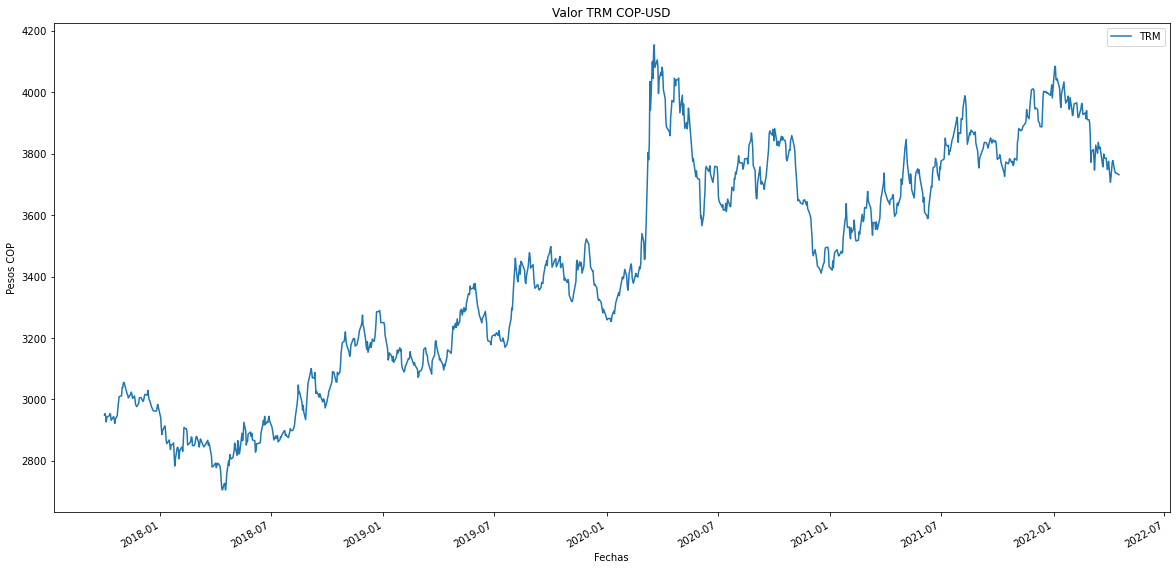

In [532]:
trm_graf=trm_df[['date','TRM']].set_index('date')
ax=trm_graf.plot(figsize=(20,10))
ax.set_ylabel('Pesos COP')
ax.set_xlabel('Fechas')
ax.set_title('Valor TRM COP-USD')

Text(0.5, 1.0, 'Diferencia Diaria TRM COP-USD')

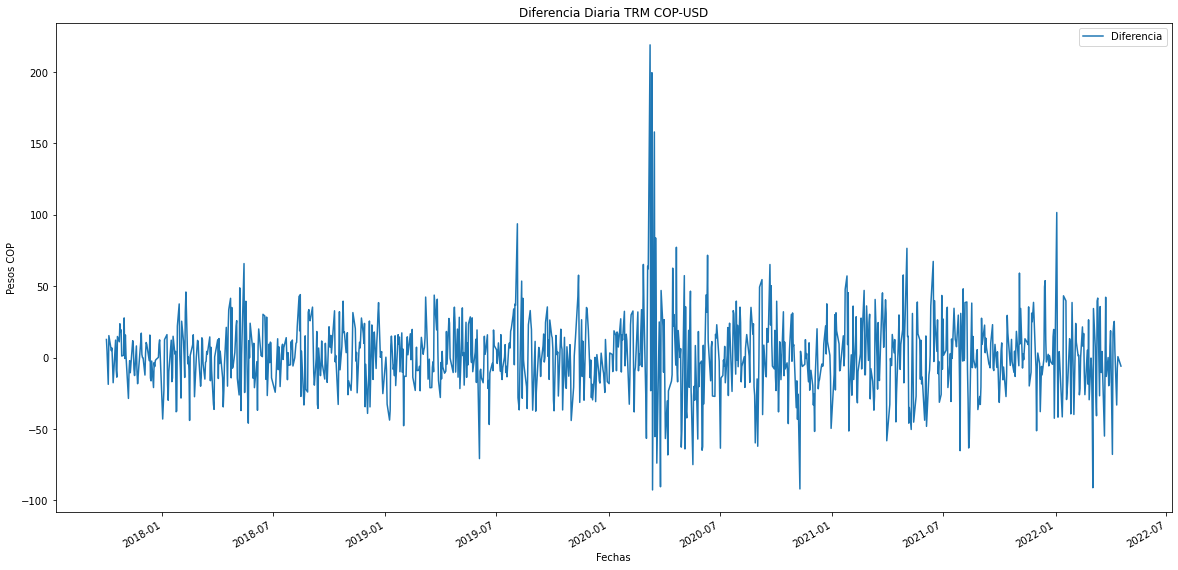

In [534]:
trm_graf=trm_df[['date','Diferencia']].set_index('date')
ax=trm_graf.plot(figsize=(20,10))
ax.set_ylabel('Pesos COP')
ax.set_xlabel('Fechas')
ax.set_title('Diferencia Diaria TRM COP-USD')

Text(0.5, 1.0, 'Valor Petroleo BRENT (USD)')

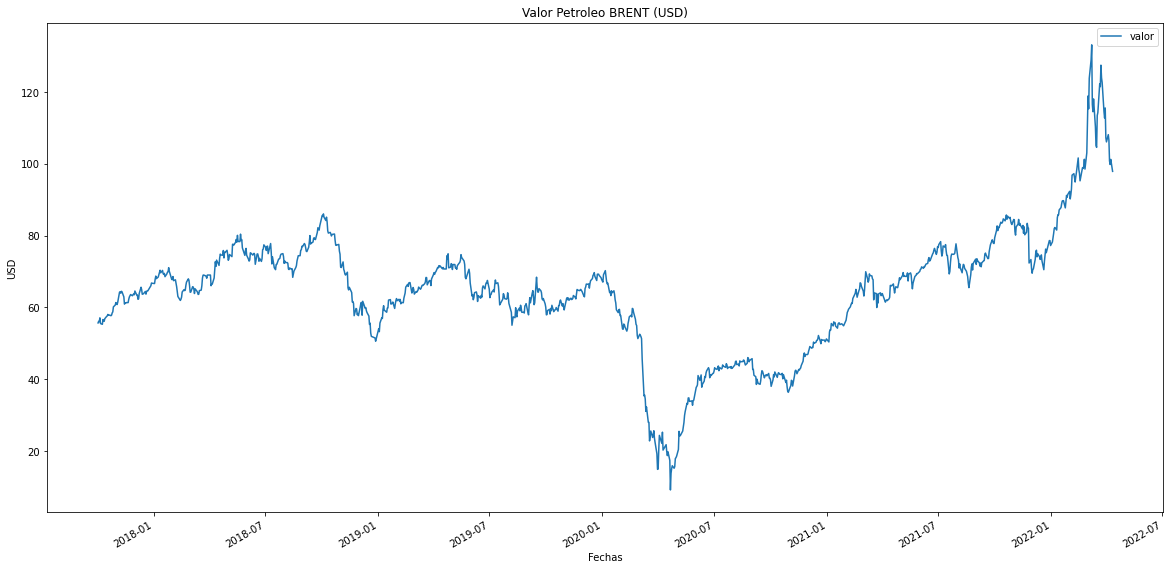

In [537]:
petroleo_graf=petroleo_df[['date','valor']].set_index('date')
#petroleo_graf.plot(figsize=(100,20))
ax=petroleo_graf.plot(figsize=(20,10))
ax.set_ylabel('USD')
ax.set_xlabel('Fechas')
ax.set_title('Valor Petroleo BRENT (USD)')

Text(0.5, 1.0, 'Diferencia Diaria Petroleo BRENT (USD)')

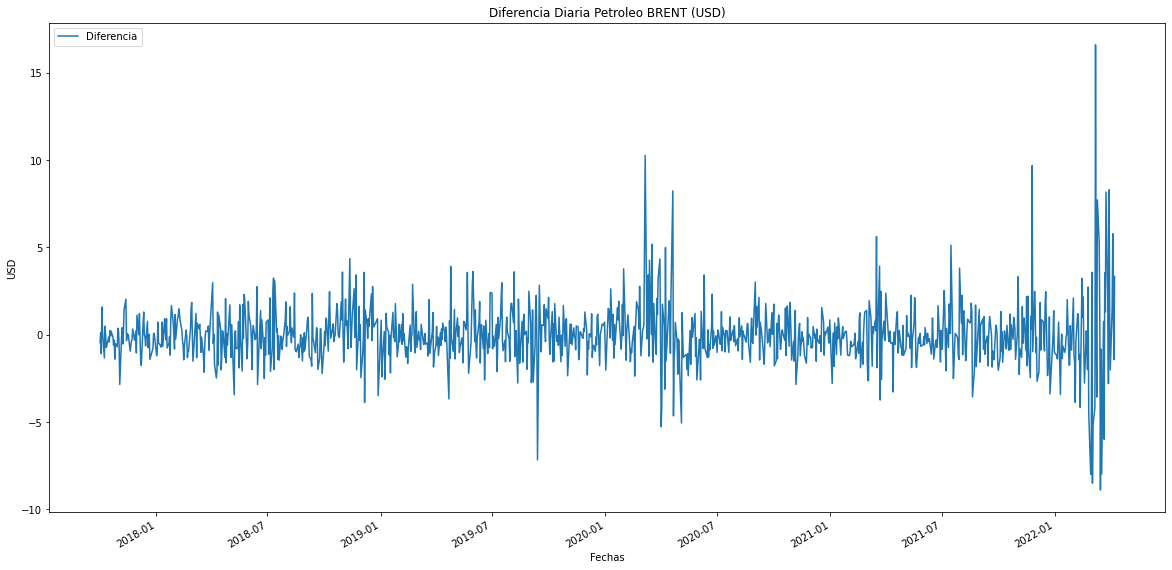

In [538]:
petroleo_graf=petroleo_df[['date','Diferencia']].set_index('date')
#petroleo_graf.plot(figsize=(100,20))
ax=petroleo_graf.plot(figsize=(20,10))
ax.set_ylabel('USD')
ax.set_xlabel('Fechas')
ax.set_title('Diferencia Diaria Petroleo BRENT (USD)')

Text(0.5, 1.0, 'Valor Oro (USD)')

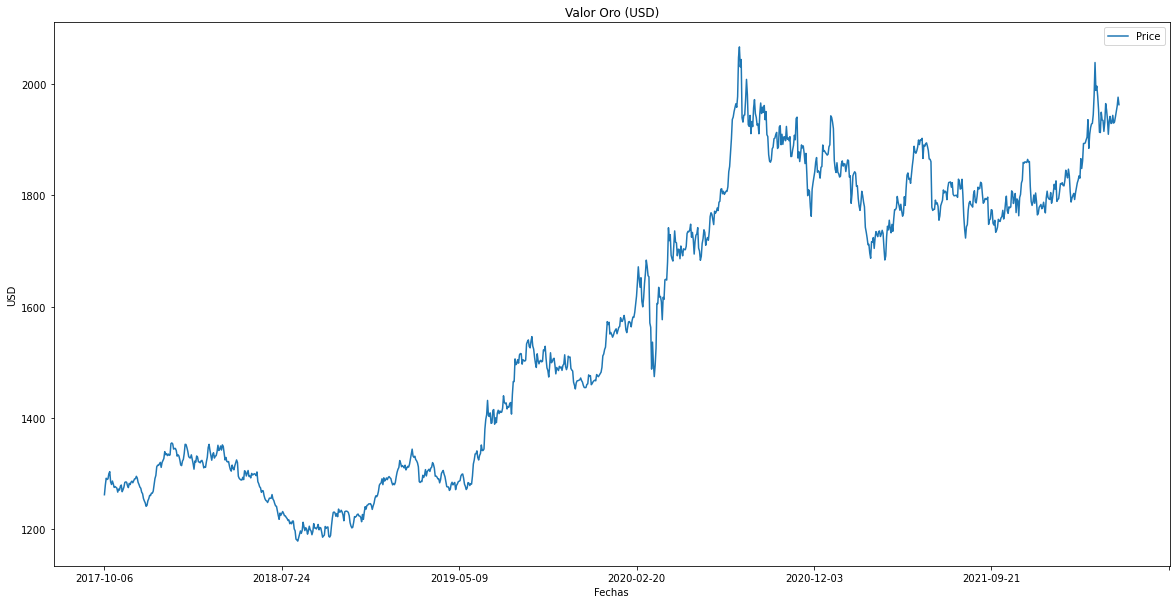

In [540]:
oro_graf=oro_df[['date','Price']].set_index('date')
#oro_graf.plot(figsize=(100,20))
ax=oro_graf.plot(figsize=(20,10))
ax.set_ylabel('USD')
ax.set_xlabel('Fechas')
ax.set_title('Valor Oro (USD)')

Text(0.5, 1.0, 'Diferencia Diaria Oro (USD)')

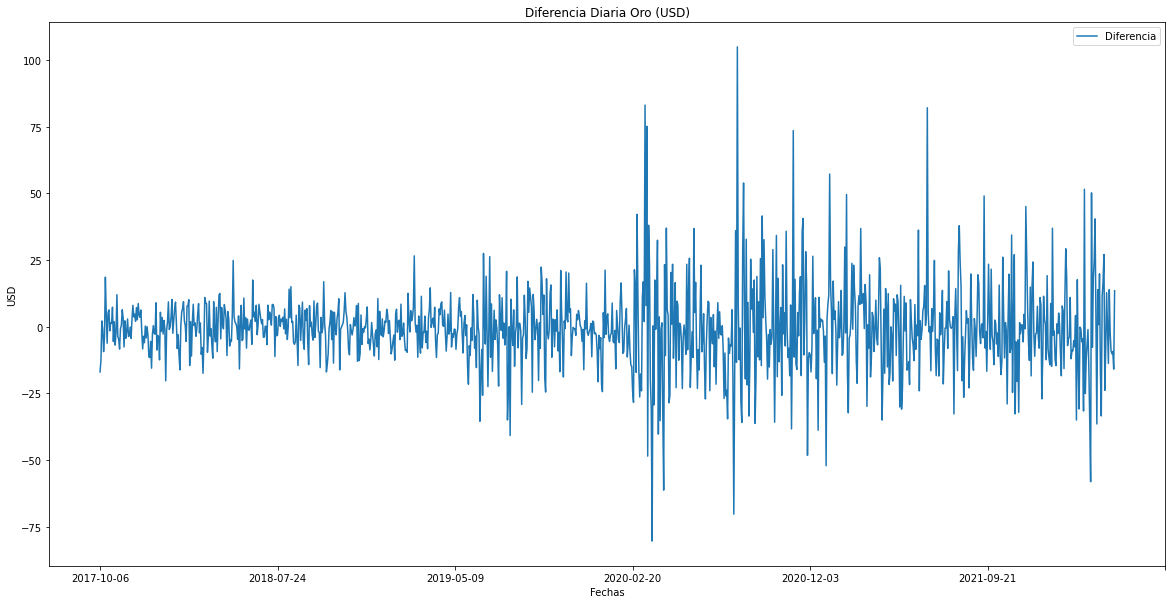

In [542]:
oro_graf=oro_df[['date','Diferencia']].set_index('date')
#oro_graf.plot(figsize=(100,20))
ax=oro_graf.plot(figsize=(20,10))
ax.set_ylabel('USD')
ax.set_xlabel('Fechas')
ax.set_title('Diferencia Diaria Oro (USD)')

### Exponente de Hurst

In [543]:
def get_hurst_exponent(time_series, max_lag=20):
    """Returns the Hurst Exponent of the time series"""
    
    lags = range(2, max_lag)

    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]

    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)

    return reg[0]

In [544]:
for lag in [20, 100, 300, 500, 1000]:
    hurst_exp = get_hurst_exponent(trm_df['TRM'].values, lag)
    print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")

Hurst exponent with 20 lags: 0.5227
Hurst exponent with 100 lags: 0.3993
Hurst exponent with 300 lags: 0.2610
Hurst exponent with 500 lags: 0.2230
Hurst exponent with 1000 lags: -0.0812


In [545]:
for lag in [20, 100, 300, 500, 1000]:
    hurst_exp = get_hurst_exponent(trm_df['Diferencia'].values, lag)
    print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")

Hurst exponent with 20 lags: 0.0140
Hurst exponent with 100 lags: 0.0054
Hurst exponent with 300 lags: 0.0122
Hurst exponent with 500 lags: 0.0218
Hurst exponent with 1000 lags: -0.0556


In [546]:
for lag in [20, 100, 300, 500, 1000]:
    hurst_exp = get_hurst_exponent(petroleo_df['valor'].values, lag)
    print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")

Hurst exponent with 20 lags: 0.5009
Hurst exponent with 100 lags: 0.4995
Hurst exponent with 300 lags: 0.4559
Hurst exponent with 500 lags: 0.4470
Hurst exponent with 1000 lags: 0.1119


In [547]:
for lag in [20, 100, 300, 500, 1000]:
    hurst_exp = get_hurst_exponent(oro_df['Price'].values, lag)
    print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")

Hurst exponent with 20 lags: 0.4215
Hurst exponent with 100 lags: 0.4400
Hurst exponent with 300 lags: 0.4675
Hurst exponent with 500 lags: 0.3942
Hurst exponent with 1000 lags: -0.0216


## opcion 2
https://towardsdatascience.com/introduction-to-the-hurst-exponent-with-code-in-python-4da0414ca52e

In [548]:
from hurst import compute_Hc

In [549]:
H, c, data = compute_Hc(trm_df['TRM'], kind='price', simplified=True)

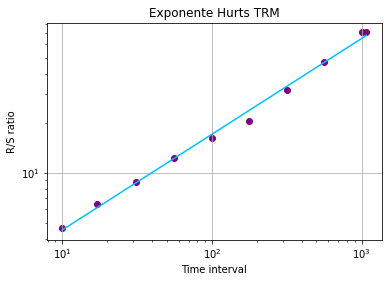

H=0.5804, c=1.1820


In [550]:
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.set_title('Exponente Hurts TRM')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

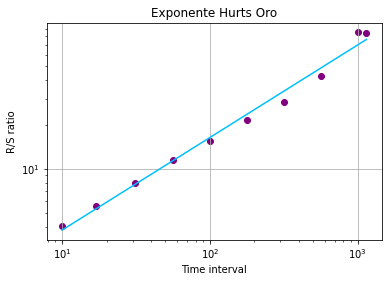

H=0.6321, c=0.8874


In [551]:
H, c, data = compute_Hc(oro_df['Price'], kind='price', simplified=True)
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.set_title('Exponente Hurts Oro')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

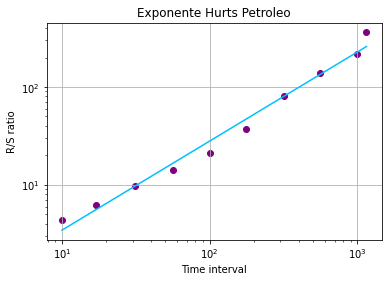

H=0.9098, c=0.4249


In [552]:
H, c, data = compute_Hc(petroleo_df['valor'], kind='price', simplified=True)
# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.set_title('Exponente Hurts Petroleo')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

## Descripción

In [553]:
trm_df['TRM'].describe()

count    1078.000000
mean     3428.757885
std       373.569338
min      2705.340000
25%      3110.890000
50%      3435.985000
75%      3769.350000
max      4153.910000
Name: TRM, dtype: float64

In [573]:
trm_df['Diferencia'].describe().to_frame('Dif_trm')

,Dif_trm
count,1078.000000
mean,0.737143
std,26.755452
min,-92.740000
25%,-14.205000
50%,0.215000
75%,15.090000
max,219.020000


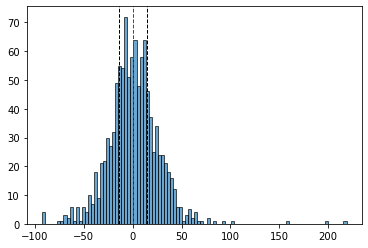

In [570]:
x=trm_df['Diferencia']
result = plt.hist(x, bins=100, edgecolor='k', alpha=0.65)
plt.axvline(x.mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x.quantile(0.75), color='k', linestyle='dashed', linewidth=1)
plt.axvline(x.quantile(0.25), color='k', linestyle='dashed', linewidth=1)

In [576]:
petroleo_df['Diferencia'].describe().to_frame('Dif_petroleo')

,Dif_petroleo
count,1150.000000
mean,-0.036739
std,1.712408
min,-8.890000
25%,-0.850000
50%,-0.120000
75%,0.670000
max,16.600000


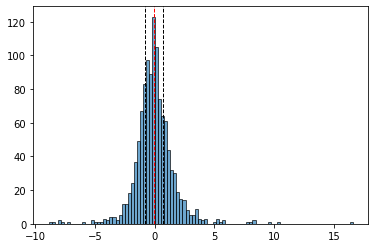

In [571]:
x=petroleo_df['Diferencia']
result = plt.hist(x, bins=100, edgecolor='k', alpha=0.65)
plt.axvline(x.mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x.quantile(0.75), color='k', linestyle='dashed', linewidth=1)
plt.axvline(x.quantile(0.25), color='k', linestyle='dashed', linewidth=1)

In [578]:
oro_df['Diferencia'].describe().to_frame('Dif_oro')

,Dif_oro
count,1144.000000
mean,-0.613156
std,15.183996
min,-80.350000
25%,-7.837500
50%,-0.800000
75%,5.950000
max,104.850000


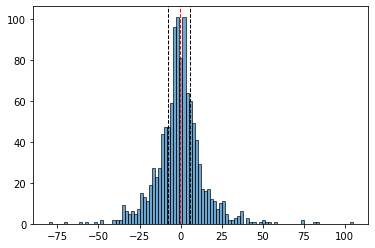

In [577]:
x=oro_df['Diferencia']
result = plt.hist(x, bins=100, edgecolor='k', alpha=0.65)
plt.axvline(x.mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(x.quantile(0.75), color='k', linestyle='dashed', linewidth=1)
plt.axvline(x.quantile(0.25), color='k', linestyle='dashed', linewidth=1)

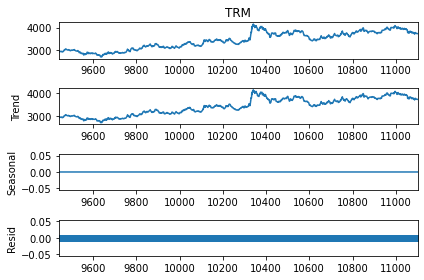

In [559]:
#from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
#series = [i+randrange(10) for i in range(1,100)]
#result = seasonal_decompose(series, model='additive', period=1)
result = seasonal_decompose(trm_df['TRM'], model='additive', period=1)
result.plot()
pyplot.show()

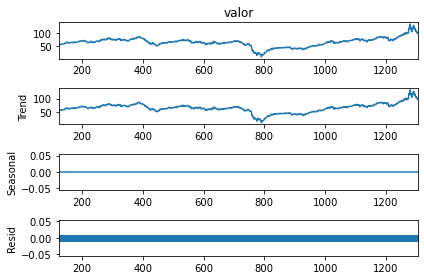

In [563]:
#from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
#series = [i+randrange(10) for i in range(1,100)]
#result = seasonal_decompose(series, model='additive', period=1)
result = seasonal_decompose(petroleo_df['valor'], model='additive', period=1)
result.plot()
pyplot.show()

In [ ]:
#from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
#series = [i+randrange(10) for i in range(1,100)]
#result = seasonal_decompose(series, model='additive', period=1)
result = seasonal_decompose(oro_df['Price'], model='additive', period=1)
result.plot()
pyplot.show()

## Power Spectra

In [449]:
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

filename = 'scope_yos2.csv'
data = pd.read_csv(filename)
ConvertToMatrix = data.values
time = np.delete(ConvertToMatrix,[1,2],axis=1)
voltage = np.delete(ConvertToMatrix,[0,2],axis=1)
NumOfSampels= len(voltage)
plt.plot(voltage)
voltage1 = voltage.transpose()
samplFreq = 1.25e9
Pxx, freqs = plt.psd(voltage1,   
NFFT=256,Fs=samplFreq,
detrend=mlab.detrend_mean,
window=mlab.window_hanning,noverlap=0,sides='onesided',scale_by_freq=True, 
return_line=None)
plt.show() """

"\nimport numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport matplotlib.mlab as mlab\n\nfilename = 'scope_yos2.csv'\ndata = pd.read_csv(filename)\nConvertToMatrix = data.values\ntime = np.delete(ConvertToMatrix,[1,2],axis=1)\nvoltage = np.delete(ConvertToMatrix,[0,2],axis=1)\nNumOfSampels= len(voltage)\nplt.plot(voltage)\nvoltage1 = voltage.transpose()\nsamplFreq = 1.25e9\nPxx, freqs = plt.psd(voltage1,   \nNFFT=256,Fs=samplFreq,\ndetrend=mlab.detrend_mean,\nwindow=mlab.window_hanning,noverlap=0,sides='onesided',scale_by_freq=True, \nreturn_line=None)\nplt.show() "

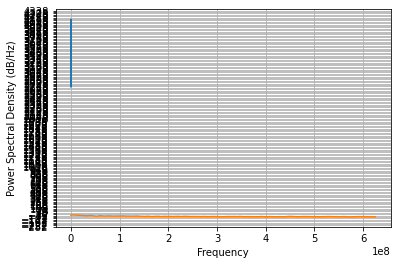

In [450]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

#filename = 'scope_yos2.csv'
#data = pd.read_csv(filename)

data=trm_df['TRM']
ConvertToMatrix = data.values
#time = np.delete(ConvertToMatrix,[1,2],axis=1)
#voltage = np.delete(ConvertToMatrix,[0,2],axis=1)
voltage = data.values
NumOfSampels= len(voltage)
plt.plot(voltage)
voltage1 = voltage.transpose()
samplFreq = 1.25e9
Pxx, freqs = plt.psd(voltage1,   
NFFT=256,Fs=samplFreq,
detrend=mlab.detrend_mean,
window=mlab.window_hanning,noverlap=0,sides='onesided',scale_by_freq=True, 
return_line=None)
plt.show()

In [451]:
trm_df['TRM']

9442     2949.33
9443     2953.81
9444     2945.59
9445     2926.82
9446     2942.19
          ...   
11091    3777.41
11094    3744.16
11095    3736.70
11096    3737.32
11101    3731.31
Name: TRM, Length: 1078, dtype: float64

In [ ]:
"""
sampling_rate = 30.0
time = np.arange(0, 10, 1/sampling_rate)
data = np.sin(2*np.pi*6*time) + np.random.randn(len(time))

fourier_transform = np.fft.rfft(data)

abs_fourier_transform = np.abs(fourier_transform)

power_spectrum = np.square(abs_fourier_transform)

frequency = np.linspace(0, sampling_rate/2, len(power_spectrum))

plt.plot(frequency, power_spectrum)
"""

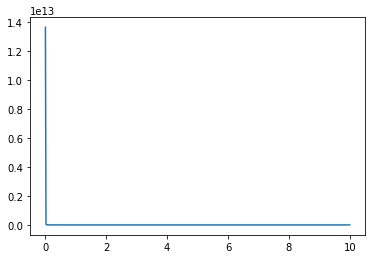

In [456]:
sampling_rate = 20.0
#time = np.arange(0, 10, 1/sampling_rate)
#data = np.sin(2*np.pi*6*time) + np.random.randn(len(time))

fourier_transform = np.fft.rfft(trm_df['TRM'])

abs_fourier_transform = np.abs(fourier_transform)

power_spectrum = np.square(abs_fourier_transform)

frequency = np.linspace(0, sampling_rate/2, len(power_spectrum))

plt.plot(frequency, power_spectrum)

In [ ]:
#Auto Correlation

In [457]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

In [458]:
autocorr_trm=autocorr(trm_df['TRM'])

In [459]:
autocorr_trm

array([1.28236780e+10, 1.28119817e+10, 1.28001717e+10, ...,
       3.30510040e+07, 2.20441708e+07, 1.10048645e+07])

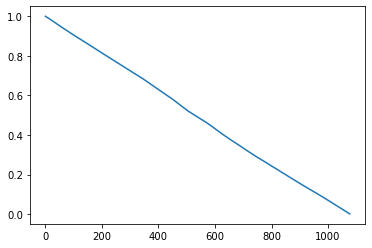

In [464]:
#fig, axes = plt.subplots(figsize=(12, 4))
#axes[1].plot(z / float(z.max()))
plt.plot(autocorr_trm / float(autocorr_trm.max()))

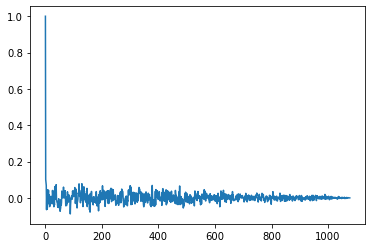

In [465]:
autocorr_trm=autocorr(trm_df['Diferencia'])
plt.plot(autocorr_trm / float(autocorr_trm.max()))

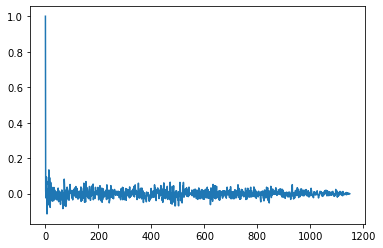

In [473]:
autocorr_trm=autocorr(petroleo_df[petroleo_df['Diferencia'].notnull()]['Diferencia'])
plt.plot(autocorr_trm / float(autocorr_trm.max()))

In [470]:
petroleo_df['Diferencia']

124    -0.45
125     0.12
126    -1.09
127     1.59
128     0.21
        ... 
1300    5.79
1301    0.98
1302   -1.43
1303    3.34
1304     NaN
Name: Diferencia, Length: 1151, dtype: float64

In [469]:
autocorr_trm

array([nan, nan, nan, ..., nan, nan, nan])

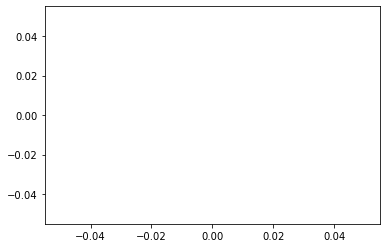

In [467]:
autocorr_trm=autocorr(oro_df['Diferencia'])
plt.plot(autocorr_trm / float(autocorr_trm.max()))

# RECORTES

# Leer Bases de datos

In [24]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd

database_username = 'root'
database_password = 'Cidifo03%%'
database_ip       = '127.0.0.1:3307'
database_name     = 'tesis'

#sqlEngine       = create_engine('mysql+pymysql://root:@127.0.0.1', pool_recycle=3600)
sqlEngine       = create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.
                                               format(database_username, database_password, 
                                                      database_ip, database_name), pool_recycle=1, pool_timeout=57600)
dbConnection    = sqlEngine.connect()

In [25]:
tweeter_dframe = pd.read_sql("select * from  tesis.t_tweets_new where created_at >= '2021-12-30 00:00:00'", dbConnection);

In [26]:
rss_dframe = pd.read_sql("select * from  tesis.t_rss_new where date >= '2021-12-30 00:00:00'", dbConnection);
dbConnection.close()

In [27]:
tweeter_dframe

,index,id,created_at,lang,id_fuente,full_text_Limpio,SentSQDM,SentTesis
0,56,1476344656724176896,2021-12-30 00:09:29,es,sergiodigra,toda nuestra solidaridad,-0.252000,-0.252000
1,5363,1476349565154603010,2021-12-30 00:29:00,en,JavierMejiaC,i think the main problem when discussing inequ...,0.647000,0.647000
2,5596,1476355915234349061,2021-12-30 00:54:14,es,Jllanosala,lo del pot por decreto es una incoherencia inm...,-1.000000,-1.000000
3,99,1476356746935472128,2021-12-30 00:57:32,es,sergiodigra,rt nos solidarizamos con ante los efectos de s...,-0.926000,-0.926000
4,5858,1476372840886808579,2021-12-30 02:01:29,es,JorgeATovar,excelente el ejercicio del dane después de cor...,-0.472661,-0.443868
...,...,...,...,...,...,...,...,...
136168,2501,1516382895924920320,2022-04-19 11:47:10,es,rcnmundo,las cuentas de psg para ser campeón de liga la...,-0.950000,-0.950000
136169,1900,1516383126951534594,2022-04-19 11:48:05,ro,lafm,editorial de parte,-0.112000,-0.112000
136170,2500,1516383244475723779,2022-04-19 11:48:33,es,rcnmundo,ciudadanos se unen la búsqueda de homicidas de...,-0.409000,-0.409000
136171,4900,1516383583014998021,2022-04-19 11:49:53,es,freddykastro,rt historias como la de diego león marín nos i...,-0.905000,-0.905000


In [28]:
rss_dframe.rename(columns={'date':'date_rss'},inplace=True)

In [29]:
rss_dframe

,index,fuenteRss,idP,date_rss,lang,texto_Limpio,polaridad,polaridad_SQDM
0,39,http://ep00.epimg.net/rss/economia/portada.xml,https://elpais.com/economia/2022/01/14/mis_der...,2022-01-14 11:53:08,esp,caso djokovic cómo se castiga en españa quien...,-0.999113,-0.994654
1,40,http://ep00.epimg.net/rss/economia/portada.xml,https://elpais.com/economia/2022/01/07/mis_der...,2022-01-08 09:49:12,esp,guía para las rebajas derecho de devolución ga...,-0.926199,-0.993272
2,0,https://www.clarin.com/rss/lo-ultimo/,https://www.clarin.com/mundo/unidos-tomo-rehen...,2022-01-15 23:17:45,esp,estados unidos tomó rehenes en una sinagoga pa...,-0.982426,-0.998816
3,1,https://www.clarin.com/rss/lo-ultimo/,https://www.clarin.com/opinion/papelon-nicarag...,2022-01-15 23:16:21,esp,del papelón en nicaragua buscar que estados un...,-0.872621,-0.989364
4,2,https://www.clarin.com/rss/lo-ultimo/,https://www.clarin.com/economia/-edesur-apagan...,2022-01-15 23:10:21,esp,en edesur estamos apagando incendios necesita...,-0.907343,-0.999999
...,...,...,...,...,...,...,...,...
40030,5,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/tur...,2022-04-18 16:35:13,esp,el sector turismo colombiano pasa del rezago c...,0.827000,-0.913000
40031,6,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/chi...,2022-04-18 12:53:26,esp,economía china crece en primer trimestre las r...,-0.928000,-0.956000
40032,7,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/com...,2022-04-18 12:31:17,esp,así favorecería colombia la venta de petróleo ...,-0.365000,-0.505000
40033,8,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/los...,2022-04-18 12:15:47,esp,los riesgos siguen al alza análisis de ricardo...,-0.968000,-0.732000


In [30]:
tweeter_dframe['created_at']=pd.to_datetime(tweeter_dframe['created_at'])

In [31]:
rss_dframe['date_rss']=pd.to_datetime(rss_dframe['date_rss'])

### Maestro Fuentes

### Comparación con Indice

In [32]:
## merge in range

In [33]:
import sqlite3

In [34]:
#Make the db in memory
conn = sqlite3.connect(':memory:')

In [35]:
#write the tables
trm_df.to_sql('trm_df', conn, index=False)
tweeter_dframe.to_sql('tweeter_dframe', conn, index=False)
rss_dframe.to_sql('rss_dframe', conn, index=False)

C:\ProgramData\Anaconda3\envs\T\lib\site-packages\pandas\core\generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [36]:
qry = '''
    select  tweeter_dframe.*, trm_df.date, trm_df.date_fin
    from tweeter_dframe  left join  trm_df  
        on tweeter_dframe.created_at >= trm_df.date and 
        tweeter_dframe.created_at < trm_df.date_fin        
    '''

In [37]:
tweeter_dframe_new=pd.read_sql_query(qry, conn)

In [38]:
qry = '''
    select  rss_dframe.*, trm_df.date, trm_df.date_fin
    from rss_dframe  left join  trm_df  
        on rss_dframe.date_rss >= trm_df.date and 
        rss_dframe.date_rss < trm_df.date_fin        
    '''

In [39]:
rss_dframe_new=pd.read_sql_query(qry, conn)

In [40]:
tweeter_dframe_new.dtypes

index                 int64
id                    int64
created_at           object
lang                 object
id_fuente            object
full_text_Limpio     object
SentSQDM            float64
SentTesis           float64
date                 object
date_fin             object
dtype: object

In [41]:
rss_dframe_new.dtypes

index               int64
fuenteRss          object
idP                object
date_rss           object
lang               object
texto_Limpio       object
polaridad         float64
polaridad_SQDM    float64
date               object
date_fin           object
dtype: object

In [42]:
conn.close()

In [43]:
tweeter_dframe_new

,index,id,created_at,lang,id_fuente,full_text_Limpio,SentSQDM,SentTesis,date,date_fin
0,56,1476344656724176896,2021-12-30 00:09:29,es,sergiodigra,toda nuestra solidaridad,-0.252000,-0.252000,2021-12-30 00:00:00,2022-01-03 00:00:00
1,5363,1476349565154603010,2021-12-30 00:29:00,en,JavierMejiaC,i think the main problem when discussing inequ...,0.647000,0.647000,2021-12-30 00:00:00,2022-01-03 00:00:00
2,5596,1476355915234349061,2021-12-30 00:54:14,es,Jllanosala,lo del pot por decreto es una incoherencia inm...,-1.000000,-1.000000,2021-12-30 00:00:00,2022-01-03 00:00:00
3,99,1476356746935472128,2021-12-30 00:57:32,es,sergiodigra,rt nos solidarizamos con ante los efectos de s...,-0.926000,-0.926000,2021-12-30 00:00:00,2022-01-03 00:00:00
4,5858,1476372840886808579,2021-12-30 02:01:29,es,JorgeATovar,excelente el ejercicio del dane después de cor...,-0.472661,-0.443868,2021-12-30 00:00:00,2022-01-03 00:00:00
...,...,...,...,...,...,...,...,...,...,...
136168,2501,1516382895924920320,2022-04-19 11:47:10,es,rcnmundo,las cuentas de psg para ser campeón de liga la...,-0.950000,-0.950000,None,None
136169,1900,1516383126951534594,2022-04-19 11:48:05,ro,lafm,editorial de parte,-0.112000,-0.112000,None,None
136170,2500,1516383244475723779,2022-04-19 11:48:33,es,rcnmundo,ciudadanos se unen la búsqueda de homicidas de...,-0.409000,-0.409000,None,None
136171,4900,1516383583014998021,2022-04-19 11:49:53,es,freddykastro,rt historias como la de diego león marín nos i...,-0.905000,-0.905000,None,None


In [44]:
rss_dframe_new

,index,fuenteRss,idP,date_rss,lang,texto_Limpio,polaridad,polaridad_SQDM,date,date_fin
0,39,http://ep00.epimg.net/rss/economia/portada.xml,https://elpais.com/economia/2022/01/14/mis_der...,2022-01-14 11:53:08,esp,caso djokovic cómo se castiga en españa quien...,-0.999113,-0.994654,2022-01-14 00:00:00,2022-01-18 00:00:00
1,40,http://ep00.epimg.net/rss/economia/portada.xml,https://elpais.com/economia/2022/01/07/mis_der...,2022-01-08 09:49:12,esp,guía para las rebajas derecho de devolución ga...,-0.926199,-0.993272,2022-01-07 00:00:00,2022-01-11 00:00:00
2,0,https://www.clarin.com/rss/lo-ultimo/,https://www.clarin.com/mundo/unidos-tomo-rehen...,2022-01-15 23:17:45,esp,estados unidos tomó rehenes en una sinagoga pa...,-0.982426,-0.998816,2022-01-14 00:00:00,2022-01-18 00:00:00
3,1,https://www.clarin.com/rss/lo-ultimo/,https://www.clarin.com/opinion/papelon-nicarag...,2022-01-15 23:16:21,esp,del papelón en nicaragua buscar que estados un...,-0.872621,-0.989364,2022-01-14 00:00:00,2022-01-18 00:00:00
4,2,https://www.clarin.com/rss/lo-ultimo/,https://www.clarin.com/economia/-edesur-apagan...,2022-01-15 23:10:21,esp,en edesur estamos apagando incendios necesita...,-0.907343,-0.999999,2022-01-14 00:00:00,2022-01-18 00:00:00
...,...,...,...,...,...,...,...,...,...,...
40030,5,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/tur...,2022-04-18 16:35:13,esp,el sector turismo colombiano pasa del rezago c...,0.827000,-0.913000,None,None
40031,6,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/chi...,2022-04-18 12:53:26,esp,economía china crece en primer trimestre las r...,-0.928000,-0.956000,None,None
40032,7,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/com...,2022-04-18 12:31:17,esp,así favorecería colombia la venta de petróleo ...,-0.365000,-0.505000,None,None
40033,8,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/los...,2022-04-18 12:15:47,esp,los riesgos siguen al alza análisis de ricardo...,-0.968000,-0.732000,None,None


In [45]:
tweeter_df_res=tweeter_dframe_new.groupby(['id_fuente','date'])[['SentTesis']].mean().reset_index()
tweeter_df_res['date']=pd.to_datetime(tweeter_df_res['date'])
tweeter_df_res

,id_fuente,date,SentTesis
0,Adcamach,2022-01-04,-0.306333
1,Adcamach,2022-01-11,0.365000
2,Adcamach,2022-01-12,-0.978000
3,Adcamach,2022-01-13,-0.996667
4,Adcamach,2022-01-19,-0.008500
...,...,...,...
3791,wef,2022-04-07,0.240417
3792,wef,2022-04-08,0.159167
3793,wef,2022-04-11,0.198333
3794,wef,2022-04-12,0.355000


In [46]:
tweeter_df_res.dtypes

id_fuente            object
date         datetime64[ns]
SentTesis           float64
dtype: object

In [47]:
rss_df_res=rss_dframe_new.groupby(['fuenteRss','date'])[['polaridad']].mean().reset_index()
rss_df_res['date']=pd.to_datetime(rss_df_res['date'])
rss_df_res

,fuenteRss,date,polaridad
0,http://elnacional.com.do/feed/,2022-01-14,-0.564382
1,http://elnacional.com.do/feed/,2022-01-28,-0.366700
2,http://elnacional.com.do/feed/,2022-02-14,-0.254733
3,http://elnacional.com.do/feed/,2022-02-15,-0.604265
4,http://elnacional.com.do/feed/,2022-02-16,-0.428533
...,...,...,...
3017,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833
3018,https://www.eltiempo.com/rss/politica.xml,2022-04-08,-0.645267
3019,https://www.eltiempo.com/rss/politica.xml,2022-04-11,-0.380857
3020,https://www.eltiempo.com/rss/politica.xml,2022-04-12,-0.773111


In [48]:
trm_df[['date','Diferencia']]

,date,Diferencia
1,2021-12-30,-42.52
5,2022-01-03,101.59
6,2022-01-04,1.36
7,2022-01-05,-41.75
8,2022-01-06,-3.05
...,...,...
100,2022-04-08,5.58
103,2022-04-11,-33.25
104,2022-04-12,-7.46
105,2022-04-13,0.62


In [49]:
trm_df.dtypes

Fecha                      object
fecha operación            object
TRM                       float64
Diferencia                float64
Dia sem                     int64
nom Dia Sem                object
fin Semana                  int64
Dif Cero                    int64
date               datetime64[ns]
date_fin           datetime64[ns]
dtype: object

In [50]:
tweeter_df_base=tweeter_df_res.merge(trm_df[['date','Diferencia']], left_on=['date'], right_on=['date'], how='left')
tweeter_df_base

,id_fuente,date,SentTesis,Diferencia
0,Adcamach,2022-01-04,-0.306333,1.36
1,Adcamach,2022-01-11,0.365000,-31.81
2,Adcamach,2022-01-12,-0.978000,-41.57
3,Adcamach,2022-01-13,-0.996667,-19.68
4,Adcamach,2022-01-19,-0.008500,-29.42
...,...,...,...,...
3791,wef,2022-04-07,0.240417,25.32
3792,wef,2022-04-08,0.159167,5.58
3793,wef,2022-04-11,0.198333,-33.25
3794,wef,2022-04-12,0.355000,-7.46


In [51]:
tweeter_df_base['tipo']='tweeter'

In [52]:
rss_df_base=rss_df_res.merge(trm_df[['date','Diferencia']], left_on=['date'], right_on=['date'], how='left')
rss_df_base.columns=['id_fuente','date','SentTesis','Diferencia']
rss_df_base['tipo']='rss'
rss_df_base

,id_fuente,date,SentTesis,Diferencia,tipo
0,http://elnacional.com.do/feed/,2022-01-14,-0.564382,43.25,rss
1,http://elnacional.com.do/feed/,2022-01-28,-0.366700,38.56,rss
2,http://elnacional.com.do/feed/,2022-02-14,-0.254733,21.45,rss
3,http://elnacional.com.do/feed/,2022-02-15,-0.604265,7.91,rss
4,http://elnacional.com.do/feed/,2022-02-16,-0.428533,16.84,rss
...,...,...,...,...,...
3017,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833,25.32,rss
3018,https://www.eltiempo.com/rss/politica.xml,2022-04-08,-0.645267,5.58,rss
3019,https://www.eltiempo.com/rss/politica.xml,2022-04-11,-0.380857,-33.25,rss
3020,https://www.eltiempo.com/rss/politica.xml,2022-04-12,-0.773111,-7.46,rss


In [53]:
df_base=tweeter_df_base.append(rss_df_base)

In [54]:
df_base

,id_fuente,date,SentTesis,Diferencia,tipo
0,Adcamach,2022-01-04,-0.306333,1.36,tweeter
1,Adcamach,2022-01-11,0.365000,-31.81,tweeter
2,Adcamach,2022-01-12,-0.978000,-41.57,tweeter
3,Adcamach,2022-01-13,-0.996667,-19.68,tweeter
4,Adcamach,2022-01-19,-0.008500,-29.42,tweeter
...,...,...,...,...,...
3017,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833,25.32,rss
3018,https://www.eltiempo.com/rss/politica.xml,2022-04-08,-0.645267,5.58,rss
3019,https://www.eltiempo.com/rss/politica.xml,2022-04-11,-0.380857,-33.25,rss
3020,https://www.eltiempo.com/rss/politica.xml,2022-04-12,-0.773111,-7.46,rss


In [55]:
df_base['id']=df_base["tipo"] + '_'+ df_base["id_fuente"]

In [56]:
df_base

,id_fuente,date,SentTesis,Diferencia,tipo,id
0,Adcamach,2022-01-04,-0.306333,1.36,tweeter,tweeter_Adcamach
1,Adcamach,2022-01-11,0.365000,-31.81,tweeter,tweeter_Adcamach
2,Adcamach,2022-01-12,-0.978000,-41.57,tweeter,tweeter_Adcamach
3,Adcamach,2022-01-13,-0.996667,-19.68,tweeter,tweeter_Adcamach
4,Adcamach,2022-01-19,-0.008500,-29.42,tweeter,tweeter_Adcamach
...,...,...,...,...,...,...
3017,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833,25.32,rss,rss_https://www.eltiempo.com/rss/politica.xml
3018,https://www.eltiempo.com/rss/politica.xml,2022-04-08,-0.645267,5.58,rss,rss_https://www.eltiempo.com/rss/politica.xml
3019,https://www.eltiempo.com/rss/politica.xml,2022-04-11,-0.380857,-33.25,rss,rss_https://www.eltiempo.com/rss/politica.xml
3020,https://www.eltiempo.com/rss/politica.xml,2022-04-12,-0.773111,-7.46,rss,rss_https://www.eltiempo.com/rss/politica.xml


In [57]:
#pd.pivot_table(tweeter_df_res, values=[])

In [58]:
import sklearn
sklearn_version = sklearn.__version__
print(sklearn_version)

0.22.2.post1


In [59]:
df_base.to_csv('2.RESULTADOS/resultados_base_trm.csv')

### Recopilación resultados

In [60]:
resultados_df=df_base[['id']].value_counts().to_frame().reset_index()

In [61]:
corr_df=df_base.groupby('id')[['SentTesis','Diferencia']].corr()

In [62]:
corr_df.reset_index(inplace=True)
corr_df=corr_df[corr_df['level_1']=='Diferencia']
corr_df.drop(columns=['Diferencia','level_1'], inplace=True)

In [63]:
res_resultados=resultados_df.merge(corr_df, left_on='id', right_on='id', how='left')
res_resultados.columns=['id','cuenta','corr']

In [64]:
corr_df=df_base.groupby('id')[['SentTesis','Diferencia']].corr(method='pearson')
corr_df.reset_index(inplace=True)
corr_df=corr_df[corr_df['level_1']=='Diferencia']
corr_df.drop(columns=['Diferencia','level_1'], inplace=True)

In [65]:
res_resultados=res_resultados.merge(corr_df, left_on='id', right_on='id', how='left')
res_resultados.columns=['id','cuenta','corr','corrPearson']

In [66]:
corr_df=df_base.groupby('id')[['SentTesis','Diferencia']].corr(method='kendall')
corr_df.reset_index(inplace=True)
corr_df=corr_df[corr_df['level_1']=='Diferencia']
corr_df.drop(columns=['Diferencia','level_1'], inplace=True)
res_resultados=res_resultados.merge(corr_df, left_on='id', right_on='id', how='left')
res_resultados.columns=['id','cuenta','corr','corrPearson','corrKendall']
res_resultados

,id,cuenta,corr,corrPearson,corrKendall
0,tweeter_BancoRepublica,70,-0.092414,-0.092414,-0.075010
1,tweeter_MantillaIgnacio,69,-0.063632,-0.063632,-0.082729
2,tweeter_NASA,68,0.293938,0.293938,0.166008
3,tweeter_Fondosdepension,68,-0.150526,-0.150526,-0.025928
4,tweeter_ecofeminita,67,0.093343,0.093343,0.097893
...,...,...,...,...,...
161,tweeter_alhosu,6,0.821835,0.821835,0.466667
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,-0.454443,-0.454443,-0.600000
163,tweeter_NoelMllr,2,-1.000000,-1.000000,-1.000000
164,tweeter_jscorrales,1,NaN,NaN,NaN


In [67]:
corr_df=df_base.groupby('id')[['SentTesis','Diferencia']].corr(method='spearman')
corr_df.reset_index(inplace=True)
corr_df=corr_df[corr_df['level_1']=='Diferencia']
corr_df.drop(columns=['Diferencia','level_1'], inplace=True)
res_resultados=res_resultados.merge(corr_df, left_on='id', right_on='id', how='left')
res_resultados.columns=['id','cuenta','corr','corrPearson','corrKendall','corrSpearman']
res_resultados

,id,cuenta,corr,corrPearson,corrKendall,corrSpearman
0,tweeter_BancoRepublica,70,-0.092414,-0.092414,-0.075010,-0.131148
1,tweeter_MantillaIgnacio,69,-0.063632,-0.063632,-0.082729,-0.114142
2,tweeter_NASA,68,0.293938,0.293938,0.166008,0.241273
3,tweeter_Fondosdepension,68,-0.150526,-0.150526,-0.025928,-0.049855
4,tweeter_ecofeminita,67,0.093343,0.093343,0.097893,0.157176
...,...,...,...,...,...,...
161,tweeter_alhosu,6,0.821835,0.821835,0.466667,0.542857
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,-0.454443,-0.454443,-0.600000,-0.700000
163,tweeter_NoelMllr,2,-1.000000,-1.000000,-1.000000,-1.000000
164,tweeter_jscorrales,1,NaN,NaN,NaN,NaN


In [68]:
res_resultados.sort_values('corrSpearman').head(30)

,id,cuenta,corr,corrPearson,corrKendall,corrSpearman
163,tweeter_NoelMllr,2,-1.000000,-1.000000,-1.000000,-1.000000
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,-0.454443,-0.454443,-0.600000,-0.700000
157,tweeter_CamiloDeGuzman,11,-0.121665,-0.121665,-0.411377,-0.477084
93,rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml,41,-0.265118,-0.265118,-0.239316,-0.354038
73,tweeter_NBCNews,42,-0.178347,-0.178347,-0.170930,-0.256240
33,tweeter_Moliverag,54,-0.359436,-0.359436,-0.168532,-0.255318
15,tweeter_mariovalencia01,61,-0.323033,-0.323033,-0.174460,-0.236776
36,tweeter_RodLuisAlberto,53,-0.187056,-0.187056,-0.170058,-0.223011
16,tweeter_MinHacienda,60,-0.178048,-0.178048,-0.140192,-0.220762
143,tweeter_Adcamach,21,-0.042043,-0.042043,-0.162681,-0.206628


In [69]:
res_resultados.sort_values('corrSpearman',ascending=False).head(30)

,id,cuenta,corr,corrPearson,corrKendall,corrSpearman
161,tweeter_alhosu,6,0.821835,0.821835,0.466667,0.542857
154,tweeter_amaldon19,12,0.439894,0.439894,0.351155,0.483363
135,tweeter_japebu,26,0.333437,0.333437,0.256173,0.407490
83,tweeter_lafm,42,0.294997,0.294997,0.247675,0.366045
107,tweeter_rcnmundo,39,0.323677,0.323677,0.259284,0.364796
67,tweeter_rcnradio,42,0.313246,0.313246,0.229070,0.354376
102,rss_http://www.eltiempo.com/rss/economia.xml,40,0.290098,0.290098,0.245029,0.341948
62,rss_http://www.portafolio.co/rss/economia/empleo,44,0.234427,0.234427,0.224339,0.319755
158,tweeter_jagallegod,10,0.395240,0.395240,0.224733,0.297874
74,rss_http://www.eltiempo.com/rss/economia_finan...,42,0.250002,0.250002,0.173256,0.280470


In [70]:
#guardar Resultado para comparación
res_corr_trm=res_resultados.copy()

In [71]:
res_resultados.to_csv('2.RESULTADOS/resultados_corr_trm.csv')

### Regresión Multilineal  (nuevo Script para no afectar librerias)
#### Preprocesamiento de la información

In [72]:
df_base

,id_fuente,date,SentTesis,Diferencia,tipo,id
0,Adcamach,2022-01-04,-0.306333,1.36,tweeter,tweeter_Adcamach
1,Adcamach,2022-01-11,0.365000,-31.81,tweeter,tweeter_Adcamach
2,Adcamach,2022-01-12,-0.978000,-41.57,tweeter,tweeter_Adcamach
3,Adcamach,2022-01-13,-0.996667,-19.68,tweeter,tweeter_Adcamach
4,Adcamach,2022-01-19,-0.008500,-29.42,tweeter,tweeter_Adcamach
...,...,...,...,...,...,...
3017,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833,25.32,rss,rss_https://www.eltiempo.com/rss/politica.xml
3018,https://www.eltiempo.com/rss/politica.xml,2022-04-08,-0.645267,5.58,rss,rss_https://www.eltiempo.com/rss/politica.xml
3019,https://www.eltiempo.com/rss/politica.xml,2022-04-11,-0.380857,-33.25,rss,rss_https://www.eltiempo.com/rss/politica.xml
3020,https://www.eltiempo.com/rss/politica.xml,2022-04-12,-0.773111,-7.46,rss,rss_https://www.eltiempo.com/rss/politica.xml


In [73]:
df_base_pivot=pd.pivot_table(df_base, values=['SentTesis'], index=['date'], columns=['id'])

In [74]:
df_base_pivot=df_base_pivot.droplevel(0, axis='columns')

In [75]:
df_base_pivot

id,rss_http://elnacional.com.do/feed/,rss_http://ep00.epimg.net/rss/economia/portada.xml,rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,rss_http://feeds.nytimes.com/nyt/rss/Business,rss_http://feeds.nytimes.com/nyt/rss/Technology,rss_http://feeds.washingtonpost.com/rss/national,rss_http://feeds.washingtonpost.com/rss/national/energy-environment,rss_http://feeds.washingtonpost.com/rss/politics,rss_http://feeds.washingtonpost.com/rss/rss_blogpost,rss_http://feeds.washingtonpost.com/rss/rss_digger,...,tweeter_mpapell,tweeter_rafaelpuyana,tweeter_razuero,tweeter_rchicave,tweeter_rcnmundo,tweeter_rcnradio,tweeter_rodriguezbraun,tweeter_sergiodigra,tweeter_suanzes,tweeter_wef
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,NaN,NaN,NaN,NaN,NaN,NaN,0.441825,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.799667,NaN,NaN
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,0.592650,NaN,NaN,NaN,...,-0.871000,-0.948,NaN,NaN,NaN,NaN,NaN,-0.707000,NaN,NaN
2022-01-04,NaN,NaN,NaN,NaN,NaN,NaN,-0.051600,NaN,NaN,NaN,...,NaN,NaN,-0.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-05,NaN,NaN,NaN,NaN,NaN,NaN,0.510600,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.962000,NaN,NaN
2022-01-06,NaN,NaN,NaN,NaN,NaN,NaN,-0.474600,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.276211,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,-0.356600,NaN,0.283778,-0.137087,-0.253625,-0.118538,0.223333,-0.002042,-0.398167,0.404000,...,NaN,NaN,NaN,-0.414368,-0.474480,-0.439410,-0.645571,-0.303333,NaN,0.240417
2022-04-08,-0.477067,NaN,0.213333,-0.004034,-0.070875,-0.151571,0.235750,0.049643,-0.427453,0.000000,...,-0.345333,NaN,NaN,-0.573576,-0.491955,-0.486162,-0.572182,-0.518200,NaN,0.159167
2022-04-11,-0.403324,NaN,0.014500,-0.094467,-0.133750,-0.524571,-0.556000,-0.233187,-0.147259,-0.105000,...,NaN,NaN,NaN,-0.545357,-0.494315,-0.617303,-0.451800,-0.158000,NaN,0.198333


In [76]:
df_base_pivot.fillna(0,inplace=True)

In [77]:
df_base_pivot=df_base_pivot.merge(trm_df[['date','Diferencia']], left_index=True, right_on=['date'], how='left')

In [78]:
df_base_pivot.set_index('date', inplace=True)

In [79]:
df_base_pivot

,rss_http://elnacional.com.do/feed/,rss_http://ep00.epimg.net/rss/economia/portada.xml,rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,rss_http://feeds.nytimes.com/nyt/rss/Business,rss_http://feeds.nytimes.com/nyt/rss/Technology,rss_http://feeds.washingtonpost.com/rss/national,rss_http://feeds.washingtonpost.com/rss/national/energy-environment,rss_http://feeds.washingtonpost.com/rss/politics,rss_http://feeds.washingtonpost.com/rss/rss_blogpost,rss_http://feeds.washingtonpost.com/rss/rss_digger,...,tweeter_rafaelpuyana,tweeter_razuero,tweeter_rchicave,tweeter_rcnmundo,tweeter_rcnradio,tweeter_rodriguezbraun,tweeter_sergiodigra,tweeter_suanzes,tweeter_wef,Diferencia
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.441825,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.799667,0.000000,0.000000,-42.52
2022-01-03,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.592650,0.000000,0.000000,0.000000,...,-0.948,0.000,0.000000,0.000000,0.000000,0.000000,-0.707000,0.000000,0.000000,101.59
2022-01-04,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.051600,0.000000,0.000000,0.000000,...,0.000,-0.004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.36
2022-01-05,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.510600,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.962000,0.000000,0.000000,-41.75
2022-01-06,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.474600,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.276211,0.000000,-3.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,-0.356600,0.000,0.283778,-0.137087,-0.253625,-0.118538,0.223333,-0.002042,-0.398167,0.404000,...,0.000,0.000,-0.414368,-0.474480,-0.439410,-0.645571,-0.303333,0.000000,0.240417,25.32
2022-04-08,-0.477067,0.000,0.213333,-0.004034,-0.070875,-0.151571,0.235750,0.049643,-0.427453,0.000000,...,0.000,0.000,-0.573576,-0.491955,-0.486162,-0.572182,-0.518200,0.000000,0.159167,5.58
2022-04-11,-0.403324,0.000,0.014500,-0.094467,-0.133750,-0.524571,-0.556000,-0.233187,-0.147259,-0.105000,...,0.000,0.000,-0.545357,-0.494315,-0.617303,-0.451800,-0.158000,0.000000,0.198333,-33.25


In [80]:
df_base_pivot.to_csv('2.RESULTADOS/base_reg_trm.csv')

# PETROLEO

In [81]:
petroleo_df.dtypes

DATE            datetime64[ns]
DCOILBRENTEU            object
dtype: object

In [82]:
petroleo_df['valor']=np.where(petroleo_df['DCOILBRENTEU']=='.',0,petroleo_df['DCOILBRENTEU'])

In [83]:
petroleo_df

,DATE,DCOILBRENTEU,valor
0,2017-04-11,54.73,54.73
1,2017-04-12,54.75,54.75
2,2017-04-13,55.05,55.05
3,2017-04-14,.,0
4,2017-04-17,54.79,54.79
...,...,...,...
1300,2022-04-05,106.6,106.6
1301,2022-04-06,100.81,100.81
1302,2022-04-07,99.83,99.83
1303,2022-04-08,101.26,101.26


In [84]:
petroleo_df['valor']=petroleo_df['valor'].astype(float)

In [85]:
petroleo_df=petroleo_df[petroleo_df['valor']!=0]

In [86]:
#cortar periodo
petroleo_df=petroleo_df[petroleo_df['DATE']>='2021-12-30']

In [87]:
petroleo_df

,DATE,DCOILBRENTEU,valor
1232,2021-12-30,78.61,78.61
1233,2021-12-31,77.24,77.24
1234,2022-01-03,78.25,78.25
1235,2022-01-04,79.39,79.39
1236,2022-01-05,80.6,80.60
...,...,...,...
1300,2022-04-05,106.6,106.60
1301,2022-04-06,100.81,100.81
1302,2022-04-07,99.83,99.83
1303,2022-04-08,101.26,101.26


In [88]:
petroleo_df['date_fin']=petroleo_df['DATE'].shift(periods=-1)

In [89]:
petroleo_df['Diferencia']=petroleo_df['valor'].diff(-1)

In [90]:
petroleo_df.rename(columns={'DATE':'date'}, inplace=True)

In [91]:
petroleo_df

,date,DCOILBRENTEU,valor,date_fin,Diferencia
1232,2021-12-30,78.61,78.61,2021-12-31,1.37
1233,2021-12-31,77.24,77.24,2022-01-03,-1.01
1234,2022-01-03,78.25,78.25,2022-01-04,-1.14
1235,2022-01-04,79.39,79.39,2022-01-05,-1.21
1236,2022-01-05,80.6,80.60,2022-01-06,-1.39
...,...,...,...,...,...
1300,2022-04-05,106.6,106.60,2022-04-06,5.79
1301,2022-04-06,100.81,100.81,2022-04-07,0.98
1302,2022-04-07,99.83,99.83,2022-04-08,-1.43
1303,2022-04-08,101.26,101.26,2022-04-11,3.34


In [92]:
## aqui voy

In [93]:
#Make the db in memory
conn = sqlite3.connect(':memory:')

In [94]:
#write the tables
petroleo_df.to_sql('petroleo_df', conn, index=False)
tweeter_dframe.to_sql('tweeter_dframe', conn, index=False)
rss_dframe.to_sql('rss_dframe', conn, index=False)

In [95]:
qry = '''
    select  tweeter_dframe.*, petroleo_df.date, petroleo_df.date_fin
    from tweeter_dframe  left join  petroleo_df  
        on tweeter_dframe.created_at >= petroleo_df.date and 
        tweeter_dframe.created_at < petroleo_df.date_fin        
    '''

In [96]:
tweeter_dframe_new=pd.read_sql_query(qry, conn)

In [97]:
qry = '''
    select  rss_dframe.*, petroleo_df.date, petroleo_df.date_fin
    from rss_dframe  left join  petroleo_df  
        on rss_dframe.date_rss >= petroleo_df.date and 
        rss_dframe.date_rss < petroleo_df.date_fin        
    '''

In [98]:
rss_dframe_new=pd.read_sql_query(qry, conn)

In [99]:
tweeter_dframe_new.dtypes

index                 int64
id                    int64
created_at           object
lang                 object
id_fuente            object
full_text_Limpio     object
SentSQDM            float64
SentTesis           float64
date                 object
date_fin             object
dtype: object

In [100]:
rss_dframe_new.dtypes

index               int64
fuenteRss          object
idP                object
date_rss           object
lang               object
texto_Limpio       object
polaridad         float64
polaridad_SQDM    float64
date               object
date_fin           object
dtype: object

In [101]:
conn.close()

In [102]:
tweeter_dframe_new

,index,id,created_at,lang,id_fuente,full_text_Limpio,SentSQDM,SentTesis,date,date_fin
0,56,1476344656724176896,2021-12-30 00:09:29,es,sergiodigra,toda nuestra solidaridad,-0.252000,-0.252000,2021-12-30 00:00:00,2021-12-31 00:00:00
1,5363,1476349565154603010,2021-12-30 00:29:00,en,JavierMejiaC,i think the main problem when discussing inequ...,0.647000,0.647000,2021-12-30 00:00:00,2021-12-31 00:00:00
2,5596,1476355915234349061,2021-12-30 00:54:14,es,Jllanosala,lo del pot por decreto es una incoherencia inm...,-1.000000,-1.000000,2021-12-30 00:00:00,2021-12-31 00:00:00
3,99,1476356746935472128,2021-12-30 00:57:32,es,sergiodigra,rt nos solidarizamos con ante los efectos de s...,-0.926000,-0.926000,2021-12-30 00:00:00,2021-12-31 00:00:00
4,5858,1476372840886808579,2021-12-30 02:01:29,es,JorgeATovar,excelente el ejercicio del dane después de cor...,-0.472661,-0.443868,2021-12-30 00:00:00,2021-12-31 00:00:00
...,...,...,...,...,...,...,...,...,...,...
136168,2501,1516382895924920320,2022-04-19 11:47:10,es,rcnmundo,las cuentas de psg para ser campeón de liga la...,-0.950000,-0.950000,None,None
136169,1900,1516383126951534594,2022-04-19 11:48:05,ro,lafm,editorial de parte,-0.112000,-0.112000,None,None
136170,2500,1516383244475723779,2022-04-19 11:48:33,es,rcnmundo,ciudadanos se unen la búsqueda de homicidas de...,-0.409000,-0.409000,None,None
136171,4900,1516383583014998021,2022-04-19 11:49:53,es,freddykastro,rt historias como la de diego león marín nos i...,-0.905000,-0.905000,None,None


In [103]:
rss_dframe_new

,index,fuenteRss,idP,date_rss,lang,texto_Limpio,polaridad,polaridad_SQDM,date,date_fin
0,39,http://ep00.epimg.net/rss/economia/portada.xml,https://elpais.com/economia/2022/01/14/mis_der...,2022-01-14 11:53:08,esp,caso djokovic cómo se castiga en españa quien...,-0.999113,-0.994654,2022-01-14 00:00:00,2022-01-17 00:00:00
1,40,http://ep00.epimg.net/rss/economia/portada.xml,https://elpais.com/economia/2022/01/07/mis_der...,2022-01-08 09:49:12,esp,guía para las rebajas derecho de devolución ga...,-0.926199,-0.993272,2022-01-07 00:00:00,2022-01-10 00:00:00
2,0,https://www.clarin.com/rss/lo-ultimo/,https://www.clarin.com/mundo/unidos-tomo-rehen...,2022-01-15 23:17:45,esp,estados unidos tomó rehenes en una sinagoga pa...,-0.982426,-0.998816,2022-01-14 00:00:00,2022-01-17 00:00:00
3,1,https://www.clarin.com/rss/lo-ultimo/,https://www.clarin.com/opinion/papelon-nicarag...,2022-01-15 23:16:21,esp,del papelón en nicaragua buscar que estados un...,-0.872621,-0.989364,2022-01-14 00:00:00,2022-01-17 00:00:00
4,2,https://www.clarin.com/rss/lo-ultimo/,https://www.clarin.com/economia/-edesur-apagan...,2022-01-15 23:10:21,esp,en edesur estamos apagando incendios necesita...,-0.907343,-0.999999,2022-01-14 00:00:00,2022-01-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...
40030,5,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/tur...,2022-04-18 16:35:13,esp,el sector turismo colombiano pasa del rezago c...,0.827000,-0.913000,None,None
40031,6,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/chi...,2022-04-18 12:53:26,esp,economía china crece en primer trimestre las r...,-0.928000,-0.956000,None,None
40032,7,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/com...,2022-04-18 12:31:17,esp,así favorecería colombia la venta de petróleo ...,-0.365000,-0.505000,None,None
40033,8,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/los...,2022-04-18 12:15:47,esp,los riesgos siguen al alza análisis de ricardo...,-0.968000,-0.732000,None,None


In [104]:
tweeter_df_res=tweeter_dframe_new.groupby(['id_fuente','date'])[['SentTesis']].mean().reset_index()
tweeter_df_res['date']=pd.to_datetime(tweeter_df_res['date'])
tweeter_df_res

,id_fuente,date,SentTesis
0,Adcamach,2022-01-04,-0.306333
1,Adcamach,2022-01-11,0.365000
2,Adcamach,2022-01-12,-0.978000
3,Adcamach,2022-01-13,-0.996667
4,Adcamach,2022-01-19,-0.008500
...,...,...,...
3786,wef,2022-04-04,0.356000
3787,wef,2022-04-05,0.395250
3788,wef,2022-04-06,0.292583
3789,wef,2022-04-07,0.240417


In [105]:
tweeter_df_res.dtypes

id_fuente            object
date         datetime64[ns]
SentTesis           float64
dtype: object

In [106]:
rss_df_res=rss_dframe_new.groupby(['fuenteRss','date'])[['polaridad']].mean().reset_index()
rss_df_res['date']=pd.to_datetime(rss_df_res['date'])
rss_df_res

,fuenteRss,date,polaridad
0,http://elnacional.com.do/feed/,2022-01-14,-0.564382
1,http://elnacional.com.do/feed/,2022-01-28,-0.366700
2,http://elnacional.com.do/feed/,2022-02-14,-0.254733
3,http://elnacional.com.do/feed/,2022-02-15,-0.604265
4,http://elnacional.com.do/feed/,2022-02-16,-0.428533
...,...,...,...
2941,https://www.eltiempo.com/rss/politica.xml,2022-04-04,-0.671333
2942,https://www.eltiempo.com/rss/politica.xml,2022-04-05,-0.692000
2943,https://www.eltiempo.com/rss/politica.xml,2022-04-06,-0.752333
2944,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833


In [107]:
trm_df[['date','Diferencia']]

,date,Diferencia
1,2021-12-30,-42.52
5,2022-01-03,101.59
6,2022-01-04,1.36
7,2022-01-05,-41.75
8,2022-01-06,-3.05
...,...,...
100,2022-04-08,5.58
103,2022-04-11,-33.25
104,2022-04-12,-7.46
105,2022-04-13,0.62


In [108]:
trm_df.dtypes

Fecha                      object
fecha operación            object
TRM                       float64
Diferencia                float64
Dia sem                     int64
nom Dia Sem                object
fin Semana                  int64
Dif Cero                    int64
date               datetime64[ns]
date_fin           datetime64[ns]
dtype: object

In [109]:
tweeter_df_base=tweeter_df_res.merge(trm_df[['date','Diferencia']], left_on=['date'], right_on=['date'], how='left')
tweeter_df_base

,id_fuente,date,SentTesis,Diferencia
0,Adcamach,2022-01-04,-0.306333,1.36
1,Adcamach,2022-01-11,0.365000,-31.81
2,Adcamach,2022-01-12,-0.978000,-41.57
3,Adcamach,2022-01-13,-0.996667,-19.68
4,Adcamach,2022-01-19,-0.008500,-29.42
...,...,...,...,...
3786,wef,2022-04-04,0.356000,-67.84
3787,wef,2022-04-05,0.395250,16.84
3788,wef,2022-04-06,0.292583,22.72
3789,wef,2022-04-07,0.240417,25.32


In [110]:
tweeter_df_base['tipo']='tweeter'

In [111]:
rss_df_base=rss_df_res.merge(trm_df[['date','Diferencia']], left_on=['date'], right_on=['date'], how='left')
rss_df_base.columns=['id_fuente','date','SentTesis','Diferencia']
rss_df_base['tipo']='rss'
rss_df_base

,id_fuente,date,SentTesis,Diferencia,tipo
0,http://elnacional.com.do/feed/,2022-01-14,-0.564382,43.25,rss
1,http://elnacional.com.do/feed/,2022-01-28,-0.366700,38.56,rss
2,http://elnacional.com.do/feed/,2022-02-14,-0.254733,21.45,rss
3,http://elnacional.com.do/feed/,2022-02-15,-0.604265,7.91,rss
4,http://elnacional.com.do/feed/,2022-02-16,-0.428533,16.84,rss
...,...,...,...,...,...
2941,https://www.eltiempo.com/rss/politica.xml,2022-04-04,-0.671333,-67.84,rss
2942,https://www.eltiempo.com/rss/politica.xml,2022-04-05,-0.692000,16.84,rss
2943,https://www.eltiempo.com/rss/politica.xml,2022-04-06,-0.752333,22.72,rss
2944,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833,25.32,rss


In [112]:
df_base=tweeter_df_base.append(rss_df_base)

In [113]:
df_base

,id_fuente,date,SentTesis,Diferencia,tipo
0,Adcamach,2022-01-04,-0.306333,1.36,tweeter
1,Adcamach,2022-01-11,0.365000,-31.81,tweeter
2,Adcamach,2022-01-12,-0.978000,-41.57,tweeter
3,Adcamach,2022-01-13,-0.996667,-19.68,tweeter
4,Adcamach,2022-01-19,-0.008500,-29.42,tweeter
...,...,...,...,...,...
2941,https://www.eltiempo.com/rss/politica.xml,2022-04-04,-0.671333,-67.84,rss
2942,https://www.eltiempo.com/rss/politica.xml,2022-04-05,-0.692000,16.84,rss
2943,https://www.eltiempo.com/rss/politica.xml,2022-04-06,-0.752333,22.72,rss
2944,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833,25.32,rss


In [114]:
df_base['id']=df_base["tipo"] + '_'+ df_base["id_fuente"]

In [115]:
df_base

,id_fuente,date,SentTesis,Diferencia,tipo,id
0,Adcamach,2022-01-04,-0.306333,1.36,tweeter,tweeter_Adcamach
1,Adcamach,2022-01-11,0.365000,-31.81,tweeter,tweeter_Adcamach
2,Adcamach,2022-01-12,-0.978000,-41.57,tweeter,tweeter_Adcamach
3,Adcamach,2022-01-13,-0.996667,-19.68,tweeter,tweeter_Adcamach
4,Adcamach,2022-01-19,-0.008500,-29.42,tweeter,tweeter_Adcamach
...,...,...,...,...,...,...
2941,https://www.eltiempo.com/rss/politica.xml,2022-04-04,-0.671333,-67.84,rss,rss_https://www.eltiempo.com/rss/politica.xml
2942,https://www.eltiempo.com/rss/politica.xml,2022-04-05,-0.692000,16.84,rss,rss_https://www.eltiempo.com/rss/politica.xml
2943,https://www.eltiempo.com/rss/politica.xml,2022-04-06,-0.752333,22.72,rss,rss_https://www.eltiempo.com/rss/politica.xml
2944,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833,25.32,rss,rss_https://www.eltiempo.com/rss/politica.xml


In [116]:
#pd.pivot_table(tweeter_df_res, values=[])

In [117]:
import sklearn
sklearn_version = sklearn.__version__
print(sklearn_version)

0.22.2.post1


In [118]:
df_base.to_csv('2.RESULTADOS/resultados_base_petroleo.csv')

### Recopilación resultados

In [119]:
resultados_df=df_base[['id']].value_counts().to_frame().reset_index()

In [120]:
corr_df=df_base.groupby('id')[['SentTesis','Diferencia']].corr()

In [121]:
corr_df.reset_index(inplace=True)
corr_df=corr_df[corr_df['level_1']=='Diferencia']
corr_df.drop(columns=['Diferencia','level_1'], inplace=True)

In [122]:
res_resultados=resultados_df.merge(corr_df, left_on='id', right_on='id', how='left')
res_resultados.columns=['id','cuenta','corr']

In [123]:
corr_df=df_base.groupby('id')[['SentTesis','Diferencia']].corr(method='pearson')
corr_df.reset_index(inplace=True)
corr_df=corr_df[corr_df['level_1']=='Diferencia']
corr_df.drop(columns=['Diferencia','level_1'], inplace=True)

In [124]:
res_resultados=res_resultados.merge(corr_df, left_on='id', right_on='id', how='left')
res_resultados.columns=['id','cuenta','corr','corrPearson']

In [125]:
corr_df=df_base.groupby('id')[['SentTesis','Diferencia']].corr(method='kendall')
corr_df.reset_index(inplace=True)
corr_df=corr_df[corr_df['level_1']=='Diferencia']
corr_df.drop(columns=['Diferencia','level_1'], inplace=True)
res_resultados=res_resultados.merge(corr_df, left_on='id', right_on='id', how='left')
res_resultados.columns=['id','cuenta','corr','corrPearson','corrKendall']
res_resultados

,id,cuenta,corr,corrPearson,corrKendall
0,tweeter_MantillaIgnacio,71,-0.074869,-0.074869,-0.069496
1,tweeter_BancoRepublica,71,-0.104050,-0.104050,-0.085559
2,tweeter_NASA,69,0.274038,0.274038,0.145262
3,tweeter_ecofeminita,68,0.082691,0.082691,0.078051
4,tweeter_Fondosdepension,68,-0.205285,-0.205285,-0.067372
...,...,...,...,...,...
161,tweeter_alhosu,6,0.821835,0.821835,0.466667
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,-0.454443,-0.454443,-0.600000
163,tweeter_NoelMllr,2,-1.000000,-1.000000,-1.000000
164,tweeter_jscorrales,1,NaN,NaN,NaN


In [126]:
corr_df=df_base.groupby('id')[['SentTesis','Diferencia']].corr(method='spearman')
corr_df.reset_index(inplace=True)
corr_df=corr_df[corr_df['level_1']=='Diferencia']
corr_df.drop(columns=['Diferencia','level_1'], inplace=True)
res_resultados=res_resultados.merge(corr_df, left_on='id', right_on='id', how='left')
res_resultados.columns=['id','cuenta','corr','corrPearson','corrKendall','corrSpearman']
res_resultados

,id,cuenta,corr,corrPearson,corrKendall,corrSpearman
0,tweeter_MantillaIgnacio,71,-0.074869,-0.074869,-0.069496,-0.099282
1,tweeter_BancoRepublica,71,-0.104050,-0.104050,-0.085559,-0.147055
2,tweeter_NASA,69,0.274038,0.274038,0.145262,0.212811
3,tweeter_ecofeminita,68,0.082691,0.082691,0.078051,0.137887
4,tweeter_Fondosdepension,68,-0.205285,-0.205285,-0.067372,-0.107806
...,...,...,...,...,...,...
161,tweeter_alhosu,6,0.821835,0.821835,0.466667,0.542857
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,-0.454443,-0.454443,-0.600000,-0.700000
163,tweeter_NoelMllr,2,-1.000000,-1.000000,-1.000000,-1.000000
164,tweeter_jscorrales,1,NaN,NaN,NaN,NaN


In [127]:
res_resultados.sort_values('corrSpearman').head(30)

,id,cuenta,corr,corrPearson,corrKendall,corrSpearman
163,tweeter_NoelMllr,2,-1.000000,-1.000000,-1.000000,-1.000000
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,-0.454443,-0.454443,-0.600000,-0.700000
155,tweeter_CamiloDeGuzman,11,-0.121665,-0.121665,-0.411377,-0.477084
154,rss_http://rss.cnn.com/rss/edition_world.rss,13,-0.165779,-0.165779,-0.366988,-0.405468
92,rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml,40,-0.235611,-0.235611,-0.220798,-0.327533
77,tweeter_NBCNews,41,-0.215235,-0.215235,-0.204054,-0.327057
32,tweeter_RodLuisAlberto,55,-0.240974,-0.240974,-0.218316,-0.290695
65,rss_http://www.reforma.com/rss/justicia.xml,42,-0.230473,-0.230473,-0.190541,-0.277761
20,tweeter_MinHacienda,60,-0.199957,-0.199957,-0.174295,-0.272500
16,tweeter_mariovalencia01,61,-0.330214,-0.330214,-0.173176,-0.234392


In [128]:
res_resultados.sort_values('corrSpearman',ascending=False).head(30)

,id,cuenta,corr,corrPearson,corrKendall,corrSpearman
161,tweeter_alhosu,6,0.821835,0.821835,0.466667,0.542857
156,tweeter_amaldon19,11,0.438995,0.438995,0.381818,0.500000
152,rss_http://www.portafolio.co/rss/economia/impu...,13,0.202950,0.202950,0.366988,0.492029
74,tweeter_lafm,41,0.315334,0.315334,0.279730,0.399636
108,tweeter_rcnmundo,38,0.335069,0.335069,0.271644,0.373383
138,tweeter_japebu,24,0.324618,0.324618,0.232727,0.372118
106,rss_http://www.eltiempo.com/rss/economia.xml,39,0.298899,0.298899,0.253944,0.358366
63,rss_http://www.portafolio.co/rss/economia/empleo,43,0.234785,0.234785,0.239316,0.340535
43,rss_https://feeds.a.dj.com/rss/RSSWSJD.xml,50,0.247211,0.247211,0.186335,0.311350
57,rss_https://www.eltiempo.com/rss/mundo_latinoa...,44,0.221671,0.221671,0.205814,0.302512


In [129]:
#guardar Resultado para comparación
res_corr_petroleo=res_resultados.copy()

In [130]:
res_resultados.to_csv('2.RESULTADOS/resultados_corr_petroleo.csv')

### Regresión Multilineal  (nuevo Script para no afectar librerias)
#### Preprocesamiento de la información

In [131]:
df_base

,id_fuente,date,SentTesis,Diferencia,tipo,id
0,Adcamach,2022-01-04,-0.306333,1.36,tweeter,tweeter_Adcamach
1,Adcamach,2022-01-11,0.365000,-31.81,tweeter,tweeter_Adcamach
2,Adcamach,2022-01-12,-0.978000,-41.57,tweeter,tweeter_Adcamach
3,Adcamach,2022-01-13,-0.996667,-19.68,tweeter,tweeter_Adcamach
4,Adcamach,2022-01-19,-0.008500,-29.42,tweeter,tweeter_Adcamach
...,...,...,...,...,...,...
2941,https://www.eltiempo.com/rss/politica.xml,2022-04-04,-0.671333,-67.84,rss,rss_https://www.eltiempo.com/rss/politica.xml
2942,https://www.eltiempo.com/rss/politica.xml,2022-04-05,-0.692000,16.84,rss,rss_https://www.eltiempo.com/rss/politica.xml
2943,https://www.eltiempo.com/rss/politica.xml,2022-04-06,-0.752333,22.72,rss,rss_https://www.eltiempo.com/rss/politica.xml
2944,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833,25.32,rss,rss_https://www.eltiempo.com/rss/politica.xml


In [132]:
df_base_pivot=pd.pivot_table(df_base, values=['SentTesis'], index=['date'], columns=['id'])

In [133]:
df_base_pivot=df_base_pivot.droplevel(0, axis='columns')

In [134]:
df_base_pivot.fillna(0,inplace=True)

In [135]:
df_base_pivot=df_base_pivot.merge(trm_df[['date','Diferencia']], left_index=True, right_on=['date'], how='left')

In [136]:
df_base_pivot.set_index('date', inplace=True)

In [137]:
df_base_pivot

,rss_http://elnacional.com.do/feed/,rss_http://ep00.epimg.net/rss/economia/portada.xml,rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,rss_http://feeds.nytimes.com/nyt/rss/Business,rss_http://feeds.nytimes.com/nyt/rss/Technology,rss_http://feeds.washingtonpost.com/rss/national,rss_http://feeds.washingtonpost.com/rss/national/energy-environment,rss_http://feeds.washingtonpost.com/rss/politics,rss_http://feeds.washingtonpost.com/rss/rss_blogpost,rss_http://feeds.washingtonpost.com/rss/rss_digger,...,tweeter_rafaelpuyana,tweeter_razuero,tweeter_rchicave,tweeter_rcnmundo,tweeter_rcnradio,tweeter_rodriguezbraun,tweeter_sergiodigra,tweeter_suanzes,tweeter_wef,Diferencia
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.441825,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.793750,0.00000,0.000000,-42.52
2021-12-31,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.811500,0.00000,0.000000,NaN
2022-01-03,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.592650,0.000000,0.000000,0.000000,...,-0.948,0.000,0.000000,0.000000,0.000000,0.000000,-0.707000,0.00000,0.000000,101.59
2022-01-04,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.051600,0.000000,0.000000,0.000000,...,0.000,-0.004,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.36
2022-01-05,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.510600,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.962000,0.00000,0.000000,-41.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-04,-0.798600,0.000,0.679200,0.097250,-0.318000,-0.174286,-0.141000,0.219250,-0.513000,-0.153500,...,0.000,0.000,-0.445250,-0.531971,-0.494500,-0.539591,-0.468714,-0.66075,0.356000,-67.84
2022-04-05,-0.496258,0.000,0.106250,-0.062000,0.389714,-0.452111,-0.056333,0.042391,-0.486111,0.367667,...,-0.669,0.000,-0.548857,-0.485640,-0.463833,-0.496900,-0.335000,-0.99800,0.395250,16.84
2022-04-06,-0.454767,-0.987,-0.322667,0.098114,-0.209667,-0.354214,0.130000,-0.209111,-0.082806,-0.012250,...,-0.982,0.000,-0.341200,-0.556240,-0.574667,-0.459125,-0.836000,0.00000,0.292583,22.72


In [138]:
df_base_pivot.to_csv('2.RESULTADOS/base_reg_petroleo.csv')

## ORO

In [139]:
oro_df.dtypes

Indice        int64
Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
año           int64
mes          object
dia           int64
mesNum        int64
fecha        object
dtype: object

In [140]:
#oro_df['valor']=np.where(oro_df['DCOILBRENTEU']=='.',0,oro_df['DCOILBRENTEU'])

In [141]:
oro_df

,Indice,Date,Price,Open,High,Low,Vol.,Change %,año,mes,dia,mesNum,fecha
0,1145,"Oct 06, 2017",1261.80,1261.80,1261.80,1261.80,-,9.57%,2017,Oct,6,10,2017-10-06
1,1144,"Oct 09, 2017",1278.75,1278.75,1278.75,1278.75,-,1.34%,2017,Oct,9,10,2017-10-09
2,1143,"Oct 10, 2017",1291.40,1291.40,1291.40,1291.40,-,0.99%,2017,Oct,10,10,2017-10-10
3,1142,"Oct 11, 2017",1289.25,1289.25,1289.25,1289.25,-,-0.17%,2017,Oct,11,10,2017-10-11
4,1141,"Oct 12, 2017",1290.25,1290.25,1290.25,1290.25,-,0.08%,2017,Oct,12,10,2017-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,5,"Apr 08, 2022",1941.40,1941.40,1941.40,1941.40,-,0.47%,2022,Apr,8,4,2022-04-08
1141,4,"Apr 11, 2022",1951.55,1951.55,1951.55,1951.55,-,0.52%,2022,Apr,11,4,2022-04-11
1142,3,"Apr 12, 2022",1960.85,1960.85,1960.85,1960.85,-,0.48%,2022,Apr,12,4,2022-04-12
1143,2,"Apr 13, 2022",1976.75,1976.75,1976.75,1976.75,-,0.81%,2022,Apr,13,4,2022-04-13


In [142]:
oro_df['Price']=oro_df['Price'].astype(float)

In [143]:
oro_df=oro_df[oro_df['Price']!=0]

In [144]:
#cortar periodo
oro_df=oro_df[oro_df['fecha']>='2021-12-30']

In [145]:
oro_df

,Indice,Date,Price,Open,High,Low,Vol.,Change %,año,mes,dia,mesNum,fecha
1070,75,"Dec 30, 2021",1805.85,1805.85,1805.85,1805.85,-,0.65%,2021,Dec,30,12,2021-12-30
1071,74,"Dec 31, 2021",1820.10,1820.10,1820.10,1820.10,-,0.79%,2021,Dec,31,12,2021-12-31
1072,73,"Jan 04, 2022",1811.40,1811.40,1811.40,1811.40,-,-0.48%,2022,Jan,4,1,2022-01-04
1073,72,"Jan 05, 2022",1826.25,1826.25,1826.25,1826.25,-,0.82%,2022,Jan,5,1,2022-01-05
1074,71,"Jan 06, 2022",1789.35,1789.35,1789.35,1789.35,-,-2.02%,2022,Jan,6,1,2022-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,5,"Apr 08, 2022",1941.40,1941.40,1941.40,1941.40,-,0.47%,2022,Apr,8,4,2022-04-08
1141,4,"Apr 11, 2022",1951.55,1951.55,1951.55,1951.55,-,0.52%,2022,Apr,11,4,2022-04-11
1142,3,"Apr 12, 2022",1960.85,1960.85,1960.85,1960.85,-,0.48%,2022,Apr,12,4,2022-04-12
1143,2,"Apr 13, 2022",1976.75,1976.75,1976.75,1976.75,-,0.81%,2022,Apr,13,4,2022-04-13


In [146]:
oro_df['date_fin']=oro_df['fecha'].shift(periods=-1)

In [147]:
oro_df['Diferencia']=oro_df['Price'].diff(-1)

In [148]:
oro_df.rename(columns={'Date':'date_old','fecha':'date'}, inplace=True)

In [149]:
oro_df

,Indice,date_old,Price,Open,High,Low,Vol.,Change %,año,mes,dia,mesNum,date,date_fin,Diferencia
1070,75,"Dec 30, 2021",1805.85,1805.85,1805.85,1805.85,-,0.65%,2021,Dec,30,12,2021-12-30,2021-12-31,-14.25
1071,74,"Dec 31, 2021",1820.10,1820.10,1820.10,1820.10,-,0.79%,2021,Dec,31,12,2021-12-31,2022-01-04,8.70
1072,73,"Jan 04, 2022",1811.40,1811.40,1811.40,1811.40,-,-0.48%,2022,Jan,4,1,2022-01-04,2022-01-05,-14.85
1073,72,"Jan 05, 2022",1826.25,1826.25,1826.25,1826.25,-,0.82%,2022,Jan,5,1,2022-01-05,2022-01-06,36.90
1074,71,"Jan 06, 2022",1789.35,1789.35,1789.35,1789.35,-,-2.02%,2022,Jan,6,1,2022-01-06,2022-01-07,-3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,5,"Apr 08, 2022",1941.40,1941.40,1941.40,1941.40,-,0.47%,2022,Apr,8,4,2022-04-08,2022-04-11,-10.15
1141,4,"Apr 11, 2022",1951.55,1951.55,1951.55,1951.55,-,0.52%,2022,Apr,11,4,2022-04-11,2022-04-12,-9.30
1142,3,"Apr 12, 2022",1960.85,1960.85,1960.85,1960.85,-,0.48%,2022,Apr,12,4,2022-04-12,2022-04-13,-15.90
1143,2,"Apr 13, 2022",1976.75,1976.75,1976.75,1976.75,-,0.81%,2022,Apr,13,4,2022-04-13,2022-04-14,13.50


In [150]:
## aqui voy

In [151]:
#Make the db in memory
conn = sqlite3.connect(':memory:')

In [152]:
#write the tables
oro_df.to_sql('oro_df', conn, index=False)
tweeter_dframe.to_sql('tweeter_dframe', conn, index=False)
rss_dframe.to_sql('rss_dframe', conn, index=False)

C:\ProgramData\Anaconda3\envs\T\lib\site-packages\pandas\core\generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [153]:
qry = '''
    select  tweeter_dframe.*, oro_df.date, oro_df.date_fin
    from tweeter_dframe  left join  oro_df  
        on tweeter_dframe.created_at >= oro_df.date and 
        tweeter_dframe.created_at < oro_df.date_fin        
    '''

In [154]:
tweeter_dframe_new=pd.read_sql_query(qry, conn)

In [155]:
qry = '''
    select  rss_dframe.*, oro_df.date, oro_df.date_fin
    from rss_dframe  left join  oro_df  
        on rss_dframe.date_rss >= oro_df.date and 
        rss_dframe.date_rss < oro_df.date_fin        
    '''

In [156]:
rss_dframe_new=pd.read_sql_query(qry, conn)

In [157]:
tweeter_dframe_new.dtypes

index                 int64
id                    int64
created_at           object
lang                 object
id_fuente            object
full_text_Limpio     object
SentSQDM            float64
SentTesis           float64
date                 object
date_fin             object
dtype: object

In [158]:
rss_dframe_new.dtypes

index               int64
fuenteRss          object
idP                object
date_rss           object
lang               object
texto_Limpio       object
polaridad         float64
polaridad_SQDM    float64
date               object
date_fin           object
dtype: object

In [159]:
conn.close()

In [160]:
tweeter_dframe_new

,index,id,created_at,lang,id_fuente,full_text_Limpio,SentSQDM,SentTesis,date,date_fin
0,56,1476344656724176896,2021-12-30 00:09:29,es,sergiodigra,toda nuestra solidaridad,-0.252000,-0.252000,2021-12-30,2021-12-31
1,5363,1476349565154603010,2021-12-30 00:29:00,en,JavierMejiaC,i think the main problem when discussing inequ...,0.647000,0.647000,2021-12-30,2021-12-31
2,5596,1476355915234349061,2021-12-30 00:54:14,es,Jllanosala,lo del pot por decreto es una incoherencia inm...,-1.000000,-1.000000,2021-12-30,2021-12-31
3,99,1476356746935472128,2021-12-30 00:57:32,es,sergiodigra,rt nos solidarizamos con ante los efectos de s...,-0.926000,-0.926000,2021-12-30,2021-12-31
4,5858,1476372840886808579,2021-12-30 02:01:29,es,JorgeATovar,excelente el ejercicio del dane después de cor...,-0.472661,-0.443868,2021-12-30,2021-12-31
...,...,...,...,...,...,...,...,...,...,...
136168,2501,1516382895924920320,2022-04-19 11:47:10,es,rcnmundo,las cuentas de psg para ser campeón de liga la...,-0.950000,-0.950000,None,None
136169,1900,1516383126951534594,2022-04-19 11:48:05,ro,lafm,editorial de parte,-0.112000,-0.112000,None,None
136170,2500,1516383244475723779,2022-04-19 11:48:33,es,rcnmundo,ciudadanos se unen la búsqueda de homicidas de...,-0.409000,-0.409000,None,None
136171,4900,1516383583014998021,2022-04-19 11:49:53,es,freddykastro,rt historias como la de diego león marín nos i...,-0.905000,-0.905000,None,None


In [161]:
rss_dframe_new

,index,fuenteRss,idP,date_rss,lang,texto_Limpio,polaridad,polaridad_SQDM,date,date_fin
0,39,http://ep00.epimg.net/rss/economia/portada.xml,https://elpais.com/economia/2022/01/14/mis_der...,2022-01-14 11:53:08,esp,caso djokovic cómo se castiga en españa quien...,-0.999113,-0.994654,2022-01-14,2022-01-17
1,40,http://ep00.epimg.net/rss/economia/portada.xml,https://elpais.com/economia/2022/01/07/mis_der...,2022-01-08 09:49:12,esp,guía para las rebajas derecho de devolución ga...,-0.926199,-0.993272,2022-01-07,2022-01-10
2,0,https://www.clarin.com/rss/lo-ultimo/,https://www.clarin.com/mundo/unidos-tomo-rehen...,2022-01-15 23:17:45,esp,estados unidos tomó rehenes en una sinagoga pa...,-0.982426,-0.998816,2022-01-14,2022-01-17
3,1,https://www.clarin.com/rss/lo-ultimo/,https://www.clarin.com/opinion/papelon-nicarag...,2022-01-15 23:16:21,esp,del papelón en nicaragua buscar que estados un...,-0.872621,-0.989364,2022-01-14,2022-01-17
4,2,https://www.clarin.com/rss/lo-ultimo/,https://www.clarin.com/economia/-edesur-apagan...,2022-01-15 23:10:21,esp,en edesur estamos apagando incendios necesita...,-0.907343,-0.999999,2022-01-14,2022-01-17
...,...,...,...,...,...,...,...,...,...,...
40030,5,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/tur...,2022-04-18 16:35:13,esp,el sector turismo colombiano pasa del rezago c...,0.827000,-0.913000,None,None
40031,6,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/chi...,2022-04-18 12:53:26,esp,economía china crece en primer trimestre las r...,-0.928000,-0.956000,None,None
40032,7,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/com...,2022-04-18 12:31:17,esp,así favorecería colombia la venta de petróleo ...,-0.365000,-0.505000,None,None
40033,8,http://www.eltiempo.com/rss/economia_sectores.xml,https://www.eltiempo.com/economia/sectores/los...,2022-04-18 12:15:47,esp,los riesgos siguen al alza análisis de ricardo...,-0.968000,-0.732000,None,None


In [162]:
tweeter_df_res=tweeter_dframe_new.groupby(['id_fuente','date'])[['SentTesis']].mean().reset_index()
tweeter_df_res['date']=pd.to_datetime(tweeter_df_res['date'])
tweeter_df_res

,id_fuente,date,SentTesis
0,Adcamach,2022-01-04,-0.306333
1,Adcamach,2022-01-11,0.365000
2,Adcamach,2022-01-12,-0.978000
3,Adcamach,2022-01-13,-0.996667
4,Adcamach,2022-01-19,-0.008500
...,...,...,...
3955,wef,2022-04-07,0.240417
3956,wef,2022-04-08,0.159167
3957,wef,2022-04-11,0.198333
3958,wef,2022-04-12,0.355000


In [163]:
tweeter_df_res.dtypes

id_fuente            object
date         datetime64[ns]
SentTesis           float64
dtype: object

In [164]:
rss_df_res=rss_dframe_new.groupby(['fuenteRss','date'])[['polaridad']].mean().reset_index()
rss_df_res['date']=pd.to_datetime(rss_df_res['date'])
rss_df_res

,fuenteRss,date,polaridad
0,http://elnacional.com.do/feed/,2022-01-14,-0.564382
1,http://elnacional.com.do/feed/,2022-01-28,-0.366700
2,http://elnacional.com.do/feed/,2022-02-14,-0.254733
3,http://elnacional.com.do/feed/,2022-02-15,-0.604265
4,http://elnacional.com.do/feed/,2022-02-16,-0.428533
...,...,...,...
3130,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833
3131,https://www.eltiempo.com/rss/politica.xml,2022-04-08,-0.645267
3132,https://www.eltiempo.com/rss/politica.xml,2022-04-11,-0.380857
3133,https://www.eltiempo.com/rss/politica.xml,2022-04-12,-0.773111


In [165]:
trm_df[['date','Diferencia']]

,date,Diferencia
1,2021-12-30,-42.52
5,2022-01-03,101.59
6,2022-01-04,1.36
7,2022-01-05,-41.75
8,2022-01-06,-3.05
...,...,...
100,2022-04-08,5.58
103,2022-04-11,-33.25
104,2022-04-12,-7.46
105,2022-04-13,0.62


In [166]:
trm_df.dtypes

Fecha                      object
fecha operación            object
TRM                       float64
Diferencia                float64
Dia sem                     int64
nom Dia Sem                object
fin Semana                  int64
Dif Cero                    int64
date               datetime64[ns]
date_fin           datetime64[ns]
dtype: object

In [167]:
tweeter_df_base=tweeter_df_res.merge(trm_df[['date','Diferencia']], left_on=['date'], right_on=['date'], how='left')
tweeter_df_base

,id_fuente,date,SentTesis,Diferencia
0,Adcamach,2022-01-04,-0.306333,1.36
1,Adcamach,2022-01-11,0.365000,-31.81
2,Adcamach,2022-01-12,-0.978000,-41.57
3,Adcamach,2022-01-13,-0.996667,-19.68
4,Adcamach,2022-01-19,-0.008500,-29.42
...,...,...,...,...
3955,wef,2022-04-07,0.240417,25.32
3956,wef,2022-04-08,0.159167,5.58
3957,wef,2022-04-11,0.198333,-33.25
3958,wef,2022-04-12,0.355000,-7.46


In [168]:
tweeter_df_base['tipo']='tweeter'

In [169]:
rss_df_base=rss_df_res.merge(trm_df[['date','Diferencia']], left_on=['date'], right_on=['date'], how='left')
rss_df_base.columns=['id_fuente','date','SentTesis','Diferencia']
rss_df_base['tipo']='rss'
rss_df_base

,id_fuente,date,SentTesis,Diferencia,tipo
0,http://elnacional.com.do/feed/,2022-01-14,-0.564382,43.25,rss
1,http://elnacional.com.do/feed/,2022-01-28,-0.366700,38.56,rss
2,http://elnacional.com.do/feed/,2022-02-14,-0.254733,21.45,rss
3,http://elnacional.com.do/feed/,2022-02-15,-0.604265,7.91,rss
4,http://elnacional.com.do/feed/,2022-02-16,-0.428533,16.84,rss
...,...,...,...,...,...
3130,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833,25.32,rss
3131,https://www.eltiempo.com/rss/politica.xml,2022-04-08,-0.645267,5.58,rss
3132,https://www.eltiempo.com/rss/politica.xml,2022-04-11,-0.380857,-33.25,rss
3133,https://www.eltiempo.com/rss/politica.xml,2022-04-12,-0.773111,-7.46,rss


In [170]:
df_base=tweeter_df_base.append(rss_df_base)

In [171]:
df_base

,id_fuente,date,SentTesis,Diferencia,tipo
0,Adcamach,2022-01-04,-0.306333,1.36,tweeter
1,Adcamach,2022-01-11,0.365000,-31.81,tweeter
2,Adcamach,2022-01-12,-0.978000,-41.57,tweeter
3,Adcamach,2022-01-13,-0.996667,-19.68,tweeter
4,Adcamach,2022-01-19,-0.008500,-29.42,tweeter
...,...,...,...,...,...
3130,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833,25.32,rss
3131,https://www.eltiempo.com/rss/politica.xml,2022-04-08,-0.645267,5.58,rss
3132,https://www.eltiempo.com/rss/politica.xml,2022-04-11,-0.380857,-33.25,rss
3133,https://www.eltiempo.com/rss/politica.xml,2022-04-12,-0.773111,-7.46,rss


In [172]:
df_base['id']=df_base["tipo"] + '_'+ df_base["id_fuente"]

In [173]:
df_base

,id_fuente,date,SentTesis,Diferencia,tipo,id
0,Adcamach,2022-01-04,-0.306333,1.36,tweeter,tweeter_Adcamach
1,Adcamach,2022-01-11,0.365000,-31.81,tweeter,tweeter_Adcamach
2,Adcamach,2022-01-12,-0.978000,-41.57,tweeter,tweeter_Adcamach
3,Adcamach,2022-01-13,-0.996667,-19.68,tweeter,tweeter_Adcamach
4,Adcamach,2022-01-19,-0.008500,-29.42,tweeter,tweeter_Adcamach
...,...,...,...,...,...,...
3130,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833,25.32,rss,rss_https://www.eltiempo.com/rss/politica.xml
3131,https://www.eltiempo.com/rss/politica.xml,2022-04-08,-0.645267,5.58,rss,rss_https://www.eltiempo.com/rss/politica.xml
3132,https://www.eltiempo.com/rss/politica.xml,2022-04-11,-0.380857,-33.25,rss,rss_https://www.eltiempo.com/rss/politica.xml
3133,https://www.eltiempo.com/rss/politica.xml,2022-04-12,-0.773111,-7.46,rss,rss_https://www.eltiempo.com/rss/politica.xml


In [174]:
#pd.pivot_table(tweeter_df_res, values=[])

In [175]:
import sklearn
sklearn_version = sklearn.__version__
print(sklearn_version)

0.22.2.post1


In [176]:
df_base.to_csv('2.RESULTADOS/resultados_base_oro.csv')

### Recopilación resultados

In [177]:
resultados_df=df_base[['id']].value_counts().to_frame().reset_index()

In [178]:
corr_df=df_base.groupby('id')[['SentTesis','Diferencia']].corr()

In [179]:
corr_df.reset_index(inplace=True)
corr_df=corr_df[corr_df['level_1']=='Diferencia']
corr_df.drop(columns=['Diferencia','level_1'], inplace=True)

In [180]:
res_resultados=resultados_df.merge(corr_df, left_on='id', right_on='id', how='left')
res_resultados.columns=['id','cuenta','corr']

In [181]:
corr_df=df_base.groupby('id')[['SentTesis','Diferencia']].corr(method='pearson')
corr_df.reset_index(inplace=True)
corr_df=corr_df[corr_df['level_1']=='Diferencia']
corr_df.drop(columns=['Diferencia','level_1'], inplace=True)

In [182]:
res_resultados=res_resultados.merge(corr_df, left_on='id', right_on='id', how='left')
res_resultados.columns=['id','cuenta','corr','corrPearson']

In [183]:
corr_df=df_base.groupby('id')[['SentTesis','Diferencia']].corr(method='kendall')
corr_df.reset_index(inplace=True)
corr_df=corr_df[corr_df['level_1']=='Diferencia']
corr_df.drop(columns=['Diferencia','level_1'], inplace=True)
res_resultados=res_resultados.merge(corr_df, left_on='id', right_on='id', how='left')
res_resultados.columns=['id','cuenta','corr','corrPearson','corrKendall']
res_resultados

,id,cuenta,corr,corrPearson,corrKendall
0,tweeter_MantillaIgnacio,73,-0.112633,-0.112633,-0.099253
1,tweeter_BancoRepublica,73,-0.090426,-0.090426,-0.086177
2,tweeter_NASA,72,0.292321,0.292321,0.166886
3,tweeter_Fondosdepension,71,-0.187683,-0.187683,-0.051417
4,tweeter_ecofeminita,71,0.105590,0.105590,0.072880
...,...,...,...,...,...
161,tweeter_alhosu,6,0.821835,0.821835,0.466667
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,-0.454443,-0.454443,-0.600000
163,tweeter_NoelMllr,2,-1.000000,-1.000000,-1.000000
164,tweeter_jscorrales,1,NaN,NaN,NaN


In [184]:
corr_df=df_base.groupby('id')[['SentTesis','Diferencia']].corr(method='spearman')
corr_df.reset_index(inplace=True)
corr_df=corr_df[corr_df['level_1']=='Diferencia']
corr_df.drop(columns=['Diferencia','level_1'], inplace=True)
res_resultados=res_resultados.merge(corr_df, left_on='id', right_on='id', how='left')
res_resultados.columns=['id','cuenta','corr','corrPearson','corrKendall','corrSpearman']
res_resultados

,id,cuenta,corr,corrPearson,corrKendall,corrSpearman
0,tweeter_MantillaIgnacio,73,-0.112633,-0.112633,-0.099253,-0.138511
1,tweeter_BancoRepublica,73,-0.090426,-0.090426,-0.086177,-0.145429
2,tweeter_NASA,72,0.292321,0.292321,0.166886,0.241998
3,tweeter_Fondosdepension,71,-0.187683,-0.187683,-0.051417,-0.081063
4,tweeter_ecofeminita,71,0.105590,0.105590,0.072880,0.125181
...,...,...,...,...,...,...
161,tweeter_alhosu,6,0.821835,0.821835,0.466667,0.542857
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,-0.454443,-0.454443,-0.600000,-0.700000
163,tweeter_NoelMllr,2,-1.000000,-1.000000,-1.000000,-1.000000
164,tweeter_jscorrales,1,NaN,NaN,NaN,NaN


In [185]:
res_resultados.sort_values('corrSpearman').head(30)

,id,cuenta,corr,corrPearson,corrKendall,corrSpearman
163,tweeter_NoelMllr,2,-1.000000,-1.000000,-1.000000,-1.000000
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,-0.454443,-0.454443,-0.600000,-0.700000
156,tweeter_CamiloDeGuzman,11,-0.121665,-0.121665,-0.411377,-0.477084
33,tweeter_RodLuisAlberto,57,-0.353440,-0.353440,-0.259819,-0.358657
88,rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml,43,-0.258956,-0.258956,-0.234432,-0.344194
34,tweeter_Moliverag,56,-0.354085,-0.354085,-0.167133,-0.254021
73,tweeter_NBCNews,44,-0.181773,-0.181773,-0.150000,-0.252593
17,tweeter_MinHacienda,63,-0.177301,-0.177301,-0.137931,-0.218122
76,rss_http://www.reforma.com/rss/internacional.xml,44,-0.163907,-0.163907,-0.133721,-0.215721
64,rss_http://www.reforma.com/rss/justicia.xml,45,-0.188821,-0.188821,-0.147675,-0.212318


In [186]:
res_resultados.sort_values('corrSpearman',ascending=False).head(30)

,id,cuenta,corr,corrPearson,corrKendall,corrSpearman
161,tweeter_alhosu,6,0.821835,0.821835,0.466667,0.542857
153,rss_http://www.portafolio.co/rss/economia/impu...,13,0.202950,0.202950,0.366988,0.492029
154,tweeter_amaldon19,12,0.439894,0.439894,0.351155,0.483363
136,tweeter_japebu,25,0.359049,0.359049,0.280936,0.431127
72,tweeter_lafm,44,0.302793,0.302793,0.263954,0.380308
106,tweeter_rcnmundo,41,0.324969,0.324969,0.278190,0.375120
69,tweeter_rcnradio,44,0.308522,0.308522,0.222093,0.342707
96,rss_http://www.eltiempo.com/rss/economia.xml,42,0.284063,0.284063,0.237332,0.336320
63,rss_http://www.portafolio.co/rss/economia/empleo,45,0.238918,0.238918,0.230727,0.333056
134,tweeter_LuisFerMejia,26,0.144575,0.144575,0.193792,0.311711


In [187]:
#guardar Resultado para comparación
res_corr_oro=res_resultados.copy()

In [188]:
res_resultados.to_csv('2.RESULTADOS/resultados_corr_oro.csv')

### Regresión Multilineal  (nuevo Script para no afectar librerias)
#### Preprocesamiento de la información

In [189]:
df_base

,id_fuente,date,SentTesis,Diferencia,tipo,id
0,Adcamach,2022-01-04,-0.306333,1.36,tweeter,tweeter_Adcamach
1,Adcamach,2022-01-11,0.365000,-31.81,tweeter,tweeter_Adcamach
2,Adcamach,2022-01-12,-0.978000,-41.57,tweeter,tweeter_Adcamach
3,Adcamach,2022-01-13,-0.996667,-19.68,tweeter,tweeter_Adcamach
4,Adcamach,2022-01-19,-0.008500,-29.42,tweeter,tweeter_Adcamach
...,...,...,...,...,...,...
3130,https://www.eltiempo.com/rss/politica.xml,2022-04-07,-0.742833,25.32,rss,rss_https://www.eltiempo.com/rss/politica.xml
3131,https://www.eltiempo.com/rss/politica.xml,2022-04-08,-0.645267,5.58,rss,rss_https://www.eltiempo.com/rss/politica.xml
3132,https://www.eltiempo.com/rss/politica.xml,2022-04-11,-0.380857,-33.25,rss,rss_https://www.eltiempo.com/rss/politica.xml
3133,https://www.eltiempo.com/rss/politica.xml,2022-04-12,-0.773111,-7.46,rss,rss_https://www.eltiempo.com/rss/politica.xml


In [190]:
df_base_pivot=pd.pivot_table(df_base, values=['SentTesis'], index=['date'], columns=['id'])

In [191]:
df_base_pivot=df_base_pivot.droplevel(0, axis='columns')

In [192]:
df_base_pivot.fillna(0,inplace=True)

In [193]:
df_base_pivot=df_base_pivot.merge(trm_df[['date','Diferencia']], left_index=True, right_on=['date'], how='left')

In [194]:
df_base_pivot.set_index('date', inplace=True)

In [195]:
df_base_pivot

,rss_http://elnacional.com.do/feed/,rss_http://ep00.epimg.net/rss/economia/portada.xml,rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,rss_http://feeds.nytimes.com/nyt/rss/Business,rss_http://feeds.nytimes.com/nyt/rss/Technology,rss_http://feeds.washingtonpost.com/rss/national,rss_http://feeds.washingtonpost.com/rss/national/energy-environment,rss_http://feeds.washingtonpost.com/rss/politics,rss_http://feeds.washingtonpost.com/rss/rss_blogpost,rss_http://feeds.washingtonpost.com/rss/rss_digger,...,tweeter_rafaelpuyana,tweeter_razuero,tweeter_rchicave,tweeter_rcnmundo,tweeter_rcnradio,tweeter_rodriguezbraun,tweeter_sergiodigra,tweeter_suanzes,tweeter_wef,Diferencia
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.441825,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.793750,0.000000,0.000000,-42.52
2021-12-31,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.592650,0.000000,0.000000,0.000000,...,-0.948,0.000,0.000000,0.000000,0.000000,0.000000,-0.776667,0.000000,0.000000,NaN
2022-01-04,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.051600,0.000000,0.000000,0.000000,...,0.000,-0.004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.36
2022-01-05,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.510600,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.962000,0.000000,0.000000,-41.75
2022-01-06,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.474600,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.276211,0.000000,-3.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-07,-0.356600,0.000,0.283778,-0.137087,-0.253625,-0.118538,0.223333,-0.002042,-0.398167,0.404000,...,0.000,0.000,-0.414368,-0.474480,-0.439410,-0.645571,-0.303333,0.000000,0.240417,25.32
2022-04-08,-0.477067,0.000,0.213333,-0.004034,-0.070875,-0.151571,0.235750,0.049643,-0.427453,0.000000,...,0.000,0.000,-0.573576,-0.491955,-0.486162,-0.572182,-0.518200,0.000000,0.159167,5.58
2022-04-11,-0.403324,0.000,0.014500,-0.094467,-0.133750,-0.524571,-0.556000,-0.233187,-0.147259,-0.105000,...,0.000,0.000,-0.545357,-0.494315,-0.617303,-0.451800,-0.158000,0.000000,0.198333,-33.25


In [196]:
df_base_pivot.to_csv('2.RESULTADOS/base_reg_oro.csv')

# Comparación resultados correlaciones

In [197]:
res_corr_trm.columns=['id', 't_cuenta', 't_corr', 't_corrPearson', 't_corrKendall', 't_corrSpearman']
res_corr_petroleo.columns=['id', 'p_cuenta', 'p_corr', 'p_corrPearson', 'p_corrKendall', 'p_corrSpearman']
res_corr_oro.columns=['id', 'o_cuenta', 'o_corr', 'o_corrPearson', 'o_corrKendall', 'o_corrSpearman']

In [198]:
res_corr_trm

,id,t_cuenta,t_corr,t_corrPearson,t_corrKendall,t_corrSpearman
0,tweeter_BancoRepublica,70,-0.092414,-0.092414,-0.075010,-0.131148
1,tweeter_MantillaIgnacio,69,-0.063632,-0.063632,-0.082729,-0.114142
2,tweeter_NASA,68,0.293938,0.293938,0.166008,0.241273
3,tweeter_Fondosdepension,68,-0.150526,-0.150526,-0.025928,-0.049855
4,tweeter_ecofeminita,67,0.093343,0.093343,0.097893,0.157176
...,...,...,...,...,...,...
161,tweeter_alhosu,6,0.821835,0.821835,0.466667,0.542857
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,-0.454443,-0.454443,-0.600000,-0.700000
163,tweeter_NoelMllr,2,-1.000000,-1.000000,-1.000000,-1.000000
164,tweeter_jscorrales,1,NaN,NaN,NaN,NaN


In [199]:
res_corr_petroleo

,id,p_cuenta,p_corr,p_corrPearson,p_corrKendall,p_corrSpearman
0,tweeter_MantillaIgnacio,71,-0.074869,-0.074869,-0.069496,-0.099282
1,tweeter_BancoRepublica,71,-0.104050,-0.104050,-0.085559,-0.147055
2,tweeter_NASA,69,0.274038,0.274038,0.145262,0.212811
3,tweeter_ecofeminita,68,0.082691,0.082691,0.078051,0.137887
4,tweeter_Fondosdepension,68,-0.205285,-0.205285,-0.067372,-0.107806
...,...,...,...,...,...,...
161,tweeter_alhosu,6,0.821835,0.821835,0.466667,0.542857
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,-0.454443,-0.454443,-0.600000,-0.700000
163,tweeter_NoelMllr,2,-1.000000,-1.000000,-1.000000,-1.000000
164,tweeter_jscorrales,1,NaN,NaN,NaN,NaN


In [200]:
res_corr_oro

,id,o_cuenta,o_corr,o_corrPearson,o_corrKendall,o_corrSpearman
0,tweeter_MantillaIgnacio,73,-0.112633,-0.112633,-0.099253,-0.138511
1,tweeter_BancoRepublica,73,-0.090426,-0.090426,-0.086177,-0.145429
2,tweeter_NASA,72,0.292321,0.292321,0.166886,0.241998
3,tweeter_Fondosdepension,71,-0.187683,-0.187683,-0.051417,-0.081063
4,tweeter_ecofeminita,71,0.105590,0.105590,0.072880,0.125181
...,...,...,...,...,...,...
161,tweeter_alhosu,6,0.821835,0.821835,0.466667,0.542857
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,-0.454443,-0.454443,-0.600000,-0.700000
163,tweeter_NoelMllr,2,-1.000000,-1.000000,-1.000000,-1.000000
164,tweeter_jscorrales,1,NaN,NaN,NaN,NaN


In [201]:
res_comp=res_corr_trm.merge(res_corr_petroleo,on='id',how='outer')
res_comp=res_comp.merge(res_corr_oro,on='id',how='outer')

In [202]:
res_comp

,id,t_cuenta,t_corr,t_corrPearson,t_corrKendall,t_corrSpearman,p_cuenta,p_corr,p_corrPearson,p_corrKendall,p_corrSpearman,o_cuenta,o_corr,o_corrPearson,o_corrKendall,o_corrSpearman
0,tweeter_BancoRepublica,70,-0.092414,-0.092414,-0.075010,-0.131148,71,-0.104050,-0.104050,-0.085559,-0.147055,73,-0.090426,-0.090426,-0.086177,-0.145429
1,tweeter_MantillaIgnacio,69,-0.063632,-0.063632,-0.082729,-0.114142,71,-0.074869,-0.074869,-0.069496,-0.099282,73,-0.112633,-0.112633,-0.099253,-0.138511
2,tweeter_NASA,68,0.293938,0.293938,0.166008,0.241273,69,0.274038,0.274038,0.145262,0.212811,72,0.292321,0.292321,0.166886,0.241998
3,tweeter_Fondosdepension,68,-0.150526,-0.150526,-0.025928,-0.049855,68,-0.205285,-0.205285,-0.067372,-0.107806,71,-0.187683,-0.187683,-0.051417,-0.081063
4,tweeter_ecofeminita,67,0.093343,0.093343,0.097893,0.157176,68,0.082691,0.082691,0.078051,0.137887,71,0.105590,0.105590,0.072880,0.125181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,tweeter_alhosu,6,0.821835,0.821835,0.466667,0.542857,6,0.821835,0.821835,0.466667,0.542857,6,0.821835,0.821835,0.466667,0.542857
162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,-0.454443,-0.454443,-0.600000,-0.700000,5,-0.454443,-0.454443,-0.600000,-0.700000,5,-0.454443,-0.454443,-0.600000,-0.700000
163,tweeter_NoelMllr,2,-1.000000,-1.000000,-1.000000,-1.000000,2,-1.000000,-1.000000,-1.000000,-1.000000,2,-1.000000,-1.000000,-1.000000,-1.000000
164,tweeter_jscorrales,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN


In [203]:
res_comp.sort_values('t_corrPearson').sample(20)

,id,t_cuenta,t_corr,t_corrPearson,t_corrKendall,t_corrSpearman,p_cuenta,p_corr,p_corrPearson,p_corrKendall,p_corrSpearman,o_cuenta,o_corr,o_corrPearson,o_corrKendall,o_corrSpearman
91,rss_http://www.reforma.com/rss/negocios.xml,41,-0.019323,-0.019323,-0.008542,-0.018119,39,-0.003238,-0.003238,0.011388,0.008207,42,-0.016464,-0.016464,-0.010982,-0.018293
61,tweeter_AlbertoBernalLE,44,-0.111071,-0.111071,-0.044444,-0.076820,43,-0.127962,-0.127962,-0.061050,-0.108546,46,-0.107341,-0.107341,-0.031746,-0.067940
153,rss_https://www.eltiempo.com/rss/mundo_africa.xml,13,0.016380,0.016380,0.102564,0.164835,13,-0.067848,-0.067848,0.030303,0.076923,12,0.136652,0.136652,0.090909,0.154545
70,rss_http://www.eltiempo.com/rss/economia_secto...,42,0.253012,0.253012,0.191861,0.277310,41,0.251558,0.251558,0.171622,0.246584,44,0.253277,0.253277,0.191861,0.271880
74,rss_http://www.eltiempo.com/rss/economia_finan...,42,0.250002,0.250002,0.173256,0.280470,41,0.214970,0.214970,0.147297,0.248608,44,0.239682,0.239682,0.175582,0.282658
140,rss_http://portafolio.co/rss/negocios/emprendi...,24,-0.177226,-0.177226,-0.090744,-0.163079,24,-0.178051,-0.178051,-0.071287,-0.139857,24,-0.178051,-0.178051,-0.071287,-0.139857
26,tweeter_LuisFelipeHenao,58,-0.153668,-0.153668,-0.098668,-0.139443,58,-0.079808,-0.079808,-0.094406,-0.122322,60,-0.027093,-0.027093,-0.066277,-0.090775
65,rss_http://www.reforma.com/rss/justicia.xml,43,-0.136896,-0.136896,-0.116408,-0.163407,42,-0.230473,-0.230473,-0.190541,-0.277761,45,-0.188821,-0.188821,-0.147675,-0.212318
23,rss_http://www.nytimes.com/services/xml/rss/ny...,58,0.140425,0.140425,0.067191,0.092654,59,0.220141,0.220141,0.095804,0.145536,61,0.042473,0.042473,0.055880,0.083803
44,tweeter_suanzes,50,-0.117373,-0.117373,-0.131536,-0.195207,53,-0.117040,-0.117040,-0.131536,-0.194631,53,-0.117040,-0.117040,-0.131536,-0.194631


## Comparar indicadores entre ellos

In [204]:
trm_df

,Fecha,fecha operación,TRM,Diferencia,Dia sem,nom Dia Sem,fin Semana,Dif Cero,date,date_fin
1,31/12/2021,30/12/2021,3981.16,-42.52,5,jue,0,0,2021-12-30,2022-01-03
5,04/01/2022,03/01/2022,4082.75,101.59,2,lun,0,0,2022-01-03,2022-01-04
6,05/01/2022,04/01/2022,4084.11,1.36,3,mar,0,0,2022-01-04,2022-01-05
7,06/01/2022,05/01/2022,4042.36,-41.75,4,mié,0,0,2022-01-05,2022-01-06
8,07/01/2022,06/01/2022,4039.31,-3.05,5,jue,0,0,2022-01-06,2022-01-07
...,...,...,...,...,...,...,...,...,...,...
100,09/04/2022,08/04/2022,3777.41,5.58,6,vie,0,0,2022-04-08,2022-04-11
103,12/04/2022,11/04/2022,3744.16,-33.25,2,lun,0,0,2022-04-11,2022-04-12
104,13/04/2022,12/04/2022,3736.70,-7.46,3,mar,0,0,2022-04-12,2022-04-13
105,14/04/2022,13/04/2022,3737.32,0.62,4,mié,0,0,2022-04-13,2022-04-18


In [205]:
petroleo_df

,date,DCOILBRENTEU,valor,date_fin,Diferencia
1232,2021-12-30,78.61,78.61,2021-12-31,1.37
1233,2021-12-31,77.24,77.24,2022-01-03,-1.01
1234,2022-01-03,78.25,78.25,2022-01-04,-1.14
1235,2022-01-04,79.39,79.39,2022-01-05,-1.21
1236,2022-01-05,80.6,80.60,2022-01-06,-1.39
...,...,...,...,...,...
1300,2022-04-05,106.6,106.60,2022-04-06,5.79
1301,2022-04-06,100.81,100.81,2022-04-07,0.98
1302,2022-04-07,99.83,99.83,2022-04-08,-1.43
1303,2022-04-08,101.26,101.26,2022-04-11,3.34


In [206]:
oro_df

,Indice,date_old,Price,Open,High,Low,Vol.,Change %,año,mes,dia,mesNum,date,date_fin,Diferencia
1070,75,"Dec 30, 2021",1805.85,1805.85,1805.85,1805.85,-,0.65%,2021,Dec,30,12,2021-12-30,2021-12-31,-14.25
1071,74,"Dec 31, 2021",1820.10,1820.10,1820.10,1820.10,-,0.79%,2021,Dec,31,12,2021-12-31,2022-01-04,8.70
1072,73,"Jan 04, 2022",1811.40,1811.40,1811.40,1811.40,-,-0.48%,2022,Jan,4,1,2022-01-04,2022-01-05,-14.85
1073,72,"Jan 05, 2022",1826.25,1826.25,1826.25,1826.25,-,0.82%,2022,Jan,5,1,2022-01-05,2022-01-06,36.90
1074,71,"Jan 06, 2022",1789.35,1789.35,1789.35,1789.35,-,-2.02%,2022,Jan,6,1,2022-01-06,2022-01-07,-3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,5,"Apr 08, 2022",1941.40,1941.40,1941.40,1941.40,-,0.47%,2022,Apr,8,4,2022-04-08,2022-04-11,-10.15
1141,4,"Apr 11, 2022",1951.55,1951.55,1951.55,1951.55,-,0.52%,2022,Apr,11,4,2022-04-11,2022-04-12,-9.30
1142,3,"Apr 12, 2022",1960.85,1960.85,1960.85,1960.85,-,0.48%,2022,Apr,12,4,2022-04-12,2022-04-13,-15.90
1143,2,"Apr 13, 2022",1976.75,1976.75,1976.75,1976.75,-,0.81%,2022,Apr,13,4,2022-04-13,2022-04-14,13.50


In [207]:
trm_df['dias_dif']=(trm_df['date_fin']-trm_df['date']).dt.days

C:\Users\CRISTH~1\AppData\Local\Temp/ipykernel_15436/710969351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trm_df['dias_dif']=(trm_df['date_fin']-trm_df['date']).dt.days


In [208]:
trm_df['delta_dif']=trm_df['Diferencia']/trm_df['dias_dif']

C:\Users\CRISTH~1\AppData\Local\Temp/ipykernel_15436/3400951742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trm_df['delta_dif']=trm_df['Diferencia']/trm_df['dias_dif']


In [209]:
trm_df

,Fecha,fecha operación,TRM,Diferencia,Dia sem,nom Dia Sem,fin Semana,Dif Cero,date,date_fin,dias_dif,delta_dif
1,31/12/2021,30/12/2021,3981.16,-42.52,5,jue,0,0,2021-12-30,2022-01-03,4.0,-10.630
5,04/01/2022,03/01/2022,4082.75,101.59,2,lun,0,0,2022-01-03,2022-01-04,1.0,101.590
6,05/01/2022,04/01/2022,4084.11,1.36,3,mar,0,0,2022-01-04,2022-01-05,1.0,1.360
7,06/01/2022,05/01/2022,4042.36,-41.75,4,mié,0,0,2022-01-05,2022-01-06,1.0,-41.750
8,07/01/2022,06/01/2022,4039.31,-3.05,5,jue,0,0,2022-01-06,2022-01-07,1.0,-3.050
...,...,...,...,...,...,...,...,...,...,...,...,...
100,09/04/2022,08/04/2022,3777.41,5.58,6,vie,0,0,2022-04-08,2022-04-11,3.0,1.860
103,12/04/2022,11/04/2022,3744.16,-33.25,2,lun,0,0,2022-04-11,2022-04-12,1.0,-33.250
104,13/04/2022,12/04/2022,3736.70,-7.46,3,mar,0,0,2022-04-12,2022-04-13,1.0,-7.460
105,14/04/2022,13/04/2022,3737.32,0.62,4,mié,0,0,2022-04-13,2022-04-18,5.0,0.124


In [210]:
petroleo_df['date']=pd.to_datetime(petroleo_df['date'])
petroleo_df['date_fin']=pd.to_datetime(petroleo_df['date_fin'])

In [211]:
petroleo_df['dias_dif']=(petroleo_df['date_fin']-petroleo_df['date']).dt.days
petroleo_df['delta_dif']=petroleo_df['Diferencia']/petroleo_df['dias_dif']
petroleo_df

,date,DCOILBRENTEU,valor,date_fin,Diferencia,dias_dif,delta_dif
1232,2021-12-30,78.61,78.61,2021-12-31,1.37,1.0,1.370000
1233,2021-12-31,77.24,77.24,2022-01-03,-1.01,3.0,-0.336667
1234,2022-01-03,78.25,78.25,2022-01-04,-1.14,1.0,-1.140000
1235,2022-01-04,79.39,79.39,2022-01-05,-1.21,1.0,-1.210000
1236,2022-01-05,80.6,80.60,2022-01-06,-1.39,1.0,-1.390000
...,...,...,...,...,...,...,...
1300,2022-04-05,106.6,106.60,2022-04-06,5.79,1.0,5.790000
1301,2022-04-06,100.81,100.81,2022-04-07,0.98,1.0,0.980000
1302,2022-04-07,99.83,99.83,2022-04-08,-1.43,1.0,-1.430000
1303,2022-04-08,101.26,101.26,2022-04-11,3.34,3.0,1.113333


In [212]:
oro_df['date']=pd.to_datetime(oro_df['date'])
oro_df['date_fin']=pd.to_datetime(oro_df['date_fin'])

In [213]:
oro_df['dias_dif']=(oro_df['date_fin']-oro_df['date']).dt.days
oro_df['delta_dif']=oro_df['Diferencia']/oro_df['dias_dif']
oro_df

,Indice,date_old,Price,Open,High,Low,Vol.,Change %,año,mes,dia,mesNum,date,date_fin,Diferencia,dias_dif,delta_dif
1070,75,"Dec 30, 2021",1805.85,1805.85,1805.85,1805.85,-,0.65%,2021,Dec,30,12,2021-12-30,2021-12-31,-14.25,1.0,-14.250000
1071,74,"Dec 31, 2021",1820.10,1820.10,1820.10,1820.10,-,0.79%,2021,Dec,31,12,2021-12-31,2022-01-04,8.70,4.0,2.175000
1072,73,"Jan 04, 2022",1811.40,1811.40,1811.40,1811.40,-,-0.48%,2022,Jan,4,1,2022-01-04,2022-01-05,-14.85,1.0,-14.850000
1073,72,"Jan 05, 2022",1826.25,1826.25,1826.25,1826.25,-,0.82%,2022,Jan,5,1,2022-01-05,2022-01-06,36.90,1.0,36.900000
1074,71,"Jan 06, 2022",1789.35,1789.35,1789.35,1789.35,-,-2.02%,2022,Jan,6,1,2022-01-06,2022-01-07,-3.25,1.0,-3.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,5,"Apr 08, 2022",1941.40,1941.40,1941.40,1941.40,-,0.47%,2022,Apr,8,4,2022-04-08,2022-04-11,-10.15,3.0,-3.383333
1141,4,"Apr 11, 2022",1951.55,1951.55,1951.55,1951.55,-,0.52%,2022,Apr,11,4,2022-04-11,2022-04-12,-9.30,1.0,-9.300000
1142,3,"Apr 12, 2022",1960.85,1960.85,1960.85,1960.85,-,0.48%,2022,Apr,12,4,2022-04-12,2022-04-13,-15.90,1.0,-15.900000
1143,2,"Apr 13, 2022",1976.75,1976.75,1976.75,1976.75,-,0.81%,2022,Apr,13,4,2022-04-13,2022-04-14,13.50,1.0,13.500000


In [214]:
# calendario
calendario=pd.date_range(start='30/12/2021', end='14/04/2022').to_frame('fecha')
calendario.columns=['fecha']
calendario

,fecha
2021-12-30,2021-12-30
2021-12-31,2021-12-31
2022-01-01,2022-01-01
2022-01-02,2022-01-02
2022-01-03,2022-01-03
...,...
2022-04-10,2022-04-10
2022-04-11,2022-04-11
2022-04-12,2022-04-12
2022-04-13,2022-04-13


In [215]:
#Make the db in memory
conn = sqlite3.connect(':memory:')

In [216]:
#write the tables
trm_df.to_sql('trm_df', conn, index=False)
petroleo_df.to_sql('petroleo_df', conn, index=False)
oro_df.to_sql('oro_df', conn, index=False)
calendario.to_sql('calendario', conn, index=False)

C:\ProgramData\Anaconda3\envs\T\lib\site-packages\pandas\core\generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [217]:
qry = '''
    select  calendario.*, trm_df.delta_dif, petroleo_df.delta_dif, oro_df.delta_dif
    from calendario  left join  trm_df  on calendario.fecha >= trm_df.date and calendario.fecha < trm_df.date_fin  
        left join  petroleo_df  on calendario.fecha >= petroleo_df.date and calendario.fecha < petroleo_df.date_fin
        left join  oro_df  on calendario.fecha >= oro_df.date and calendario.fecha < oro_df.date_fin
    '''

In [218]:
calendario_new=pd.read_sql_query(qry, conn)

In [219]:
conn.close()

In [220]:
calendario_new.set_index('fecha',inplace=True)
calendario_new.columns=['d_trm','d_petroleo','d_oro']
calendario_new

,d_trm,d_petroleo,d_oro
fecha,,,
2021-12-30 00:00:00,-10.630,1.370000,-14.250000
2021-12-31 00:00:00,-10.630,-0.336667,2.175000
2022-01-01 00:00:00,-10.630,-0.336667,2.175000
2022-01-02 00:00:00,-10.630,-0.336667,2.175000
2022-01-03 00:00:00,101.590,-1.140000,2.175000
...,...,...,...
2022-04-10 00:00:00,1.860,1.113333,-3.383333
2022-04-11 00:00:00,-33.250,NaN,-9.300000
2022-04-12 00:00:00,-7.460,NaN,-15.900000


In [221]:
#corr_matrix = data_ocupacion.select_dtypes(include=['float64', 'int']).corr(method='pearson')
corr_matrix=calendario_new.corr(method='pearson')
corr_matrix

,d_trm,d_petroleo,d_oro
d_trm,1.000000,0.033016,0.077711
d_petroleo,0.033016,1.000000,0.481158
d_oro,0.077711,0.481158,1.000000


In [222]:
#corr_matrix = data_ocupacion.select_dtypes(include=['float64', 'int']).corr(method='pearson')
calendario_new.corr(method='spearman')

,d_trm,d_petroleo,d_oro
d_trm,1.000000,0.036074,0.140538
d_petroleo,0.036074,1.000000,0.387335
d_oro,0.140538,0.387335,1.000000


In [223]:
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 16))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

# Parte Regresion y otros modelos

In [ ]:
X_train=df_base_pivot.copy()
X_train=X_train.drop(columns=['Diferencia'])
y_train=df_base_pivot['Diferencia'] 

In [ ]:
#Modelos
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [ ]:
### combinaciones
3 indicadores
2 tweeter y rss
Regresión multilineal

# Pasos a Seguir
3. Validar correlación con Lags
4. Validar correlacion spearman